In [235]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from dateutil.parser import parse
from datetime import datetime
import random
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Load the Dataset
df_rating_books_raw = pd.read_csv('../data/processed/filtered_data_processed.csv')

df_rating_books_raw .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502038 entries, 0 to 502037
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      502038 non-null  int64  
 1   index           502038 non-null  int64  
 2   review          502038 non-null  float64
 3   text            502038 non-null  object 
 4   review_year     502038 non-null  int64  
 5   authors         502038 non-null  object 
 6   publisher       502038 non-null  object 
 7   categories      502038 non-null  object 
 8   published_year  502038 non-null  int64  
 9   helpfulness     502038 non-null  float64
 10  num_row         502038 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 42.1+ MB


In [3]:
df_rating_books_processed = df_rating_books_raw.drop(['Unnamed: 0'], axis=1)

In [4]:
df_vader_sentiment_raw = pd.read_csv('../data/processed/df_reduced_with_sentiment.csv')

df_vader_sentiment_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502038 entries, 0 to 502037
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          502038 non-null  int64  
 1   num_row             502038 non-null  int64  
 2   text_clean          502035 non-null  object 
 3   compound_sentiment  502038 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 15.3+ MB


In [5]:
df_vader_sentiment_processed = df_vader_sentiment_raw.drop(['Unnamed: 0'], axis=1)
df_vader_sentiment_processed.sample()

,num_row,text_clean,compound_sentiment
229105,229105,huge fan manga anime far best along rest serie...,0.8658


In [148]:
df_all_data_processed = df_rating_books_processed.merge(df_vader_sentiment_processed, on='num_row', how='inner')
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502038 entries, 0 to 502037
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               502038 non-null  int64  
 1   review              502038 non-null  float64
 2   text                502038 non-null  object 
 3   review_year         502038 non-null  int64  
 4   authors             502038 non-null  object 
 5   publisher           502038 non-null  object 
 6   categories          502038 non-null  object 
 7   published_year      502038 non-null  int64  
 8   helpfulness         502038 non-null  float64
 9   num_row             502038 non-null  int64  
 10  text_clean          502035 non-null  object 
 11  compound_sentiment  502038 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 46.0+ MB


In [149]:
#Original Text is removed as clean text is added
df_all_data_processed = df_all_data_processed.drop(['text'], axis=1)
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502038 entries, 0 to 502037
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               502038 non-null  int64  
 1   review              502038 non-null  float64
 2   review_year         502038 non-null  int64  
 3   authors             502038 non-null  object 
 4   publisher           502038 non-null  object 
 5   categories          502038 non-null  object 
 6   published_year      502038 non-null  int64  
 7   helpfulness         502038 non-null  float64
 8   num_row             502038 non-null  int64  
 9   text_clean          502035 non-null  object 
 10  compound_sentiment  502038 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 42.1+ MB


In [150]:
df_all_data_processed = df_all_data_processed.drop(['index'], axis=1)
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502038 entries, 0 to 502037
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   review              502038 non-null  float64
 1   review_year         502038 non-null  int64  
 2   authors             502038 non-null  object 
 3   publisher           502038 non-null  object 
 4   categories          502038 non-null  object 
 5   published_year      502038 non-null  int64  
 6   helpfulness         502038 non-null  float64
 7   num_row             502038 non-null  int64  
 8   text_clean          502035 non-null  object 
 9   compound_sentiment  502038 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 38.3+ MB


In [151]:
df_all_data_processed = df_all_data_processed.drop(['num_row'], axis=1)
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502038 entries, 0 to 502037
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   review              502038 non-null  float64
 1   review_year         502038 non-null  int64  
 2   authors             502038 non-null  object 
 3   publisher           502038 non-null  object 
 4   categories          502038 non-null  object 
 5   published_year      502038 non-null  int64  
 6   helpfulness         502038 non-null  float64
 7   text_clean          502035 non-null  object 
 8   compound_sentiment  502038 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 34.5+ MB


In [152]:
def custom_string_to_list(s):
    if isinstance(s, str):
        return [item.strip(" '[]") for item in s.split(',')]
    else:
        return s

In [153]:
df_all_data_processed['authors'] = df_all_data_processed['authors'].apply(custom_string_to_list)
df_all_data_processed['categories'] = df_all_data_processed['categories'].apply(custom_string_to_list)

In [154]:
ordered_columns = ['authors', 'categories', 'publisher', 'published_year', 'review_year', 'helpfulness', 'text_clean','compound_sentiment', 'review']

In [155]:
df_all_data_processed = df_all_data_processed[ordered_columns]

In [156]:
df_all_data_processed.sample(10)

,authors,categories,publisher,published_year,review_year,helpfulness,text_clean,compound_sentiment,review
336101,[Other],[Other],Other,2021,2000,0.750000,ok say book apart fact &quot;loved it&quot; since age seeing sir laurence olivier shakespeares &quot;richard iii&quot; intrigued story book polic...,0.9360,5.0
492117,[Other],[Fiction],Other,2004,2005,1.000000,tully mars keeper light caribbean mind jimmy buffet meets expatriates adventurers light hearted quest escape wyoming cayo loco tullys refugei enjo...,0.8402,4.0
263849,[Other],[History],Other,1989,1997,1.000000,scott seregnys wellresearched monograph must seeking information intricate important relationship russian teachers zemstvo officials,0.3400,5.0
232140,[Other],[Social Science],Other,2018,2010,0.666667,book full unintentional comedy want good laugh reading ridiculously backwards ideas healthy relationship pick gem up,0.8625,5.0
229943,[Other],[Business & Economics],Other,2007,2006,0.333333,found book interesting useful refers decisions made consciously unconsciously blink eye literally snap decisions realworld references made good ba...,0.9338,5.0
4691,[Other],[Fiction],Other,2006,2001,0.666667,almost anyone find short stories collection enjoyable golfers cant miss collectionthat said &quot;heart goof&quot; rate stars quite level wodeho...,0.9612,4.0
137895,[Other],[Other],Other,1995,2007,0.857143,wisdom hebrew alphabet published artscroll treasure trove interesting & helpful insights related walk faith whether jewish christian absorbed auth...,0.9633,5.0
153310,[Other],[Other],Other,2013,2003,0.653846,disappointed read book expected get practical examples implementing dsp fpgai regret attracted name book reviews definitely sillicon valley excep...,0.3400,1.0
120545,[Other],[Other],Other,1998,2007,1.000000,home school son needed find book would help understand life like colonial days book proved perfect fit great activities continually asking project...,0.9665,5.0
189824,[Other],[Other],Other,1870,1999,1.000000,enjoyed reading grail part pendragon cycle second third time read enjoy time reread it sign good book think however unlike pendragon books grail n...,0.9383,3.0


# Analysis and EDA for target feature

In [15]:
df_all_data_processed['review'].value_counts()

review
5.0    300936
4.0     98069
3.0     42657
1.0     34328
2.0     26048
Name: count, dtype: int64

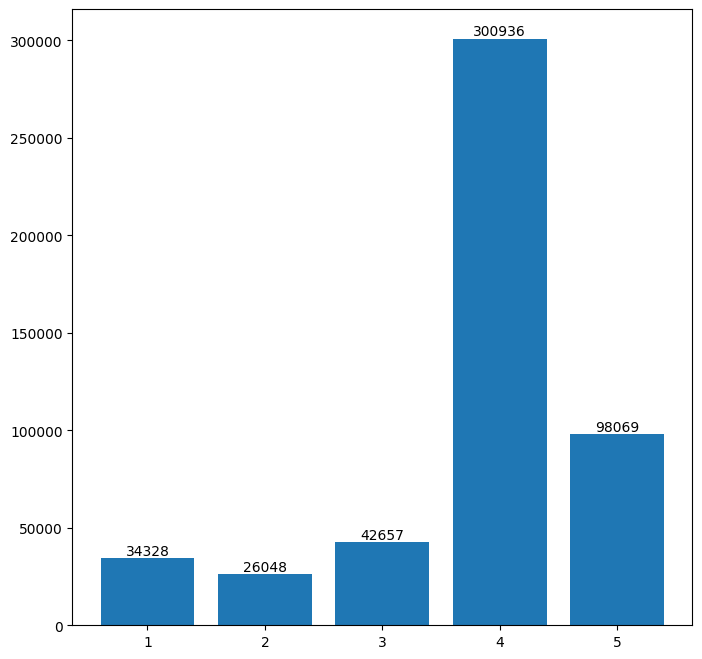

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_processed['review'].unique(), df_all_data_processed['review'].value_counts())
ax.bar_label(bars)
plt.show()

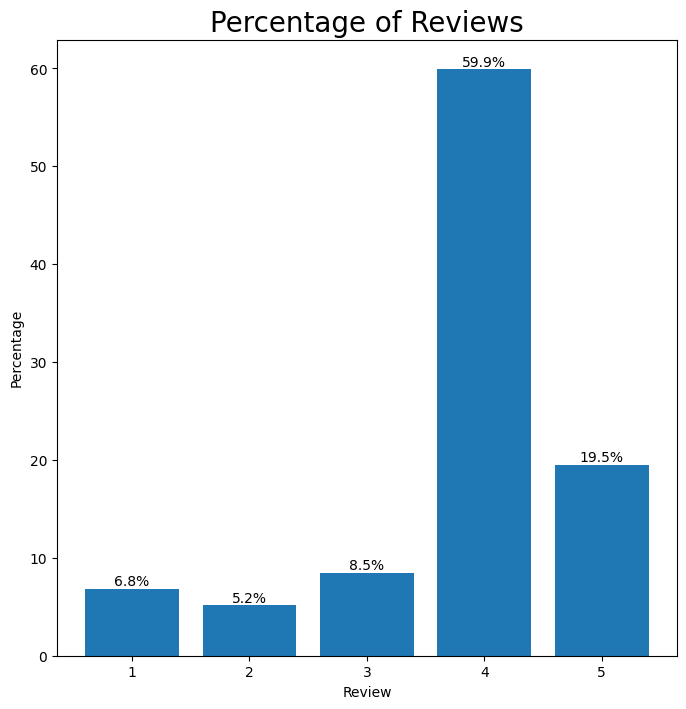

In [17]:
#Show a barplot by Percentages
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_processed['review'].unique(), (df_all_data_processed['review'].value_counts())/(df_all_data_processed['review'].value_counts().sum())*100)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Review')
plt.ylabel('Percentage')
plt.title('Percentage of Reviews', fontsize = 20)
plt.show()

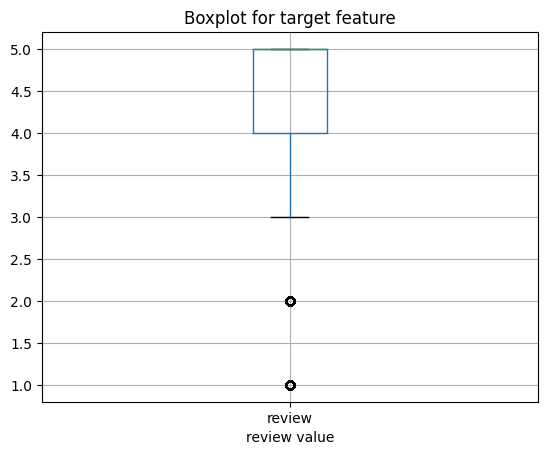

In [18]:
#Create a box plot to check for outliers, median and quartiles
df_all_data_processed.boxplot(column='review')
plt.xlabel("review value")
plt.title("Boxplot for target feature")
plt.show()

In [19]:
df_all_data_processed['review'].describe().T

count    502038.000000
mean          4.205560
std           1.210404
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review, dtype: float64

## Key Findings:
- The Dataset is unbalanced. Having 79.4% of the entries with a High/Postive review [4, 5]. Only 12% of the entries have a Low/Negative review [1, 2]. And 8.5% of the entries reviews are neutral [3]
- The Dataset review target feature is biased. Having the 25% Quartile above 4, and 50% and 75% Quartiles on 5. 
- The entries on the dataset with a low review [1, 2] are almost considered as outliers on the boxplot.

# Univariate EDA

## Categories

In [20]:
categories = df_all_data_processed['categories'].explode()
categories.info()

<class 'pandas.core.series.Series'>
Index: 502139 entries, 0 to 502037
Series name: categories
Non-Null Count   Dtype 
--------------   ----- 
502139 non-null  object
dtypes: object(1)
memory usage: 7.7+ MB


In [21]:
print(f'Total of Categories: {len(categories.unique())}')

Total of Categories: 10


In [22]:
categories_counts = categories.value_counts()
print(f'Total of entries after explode category column {categories_counts.sum()}')

Total of entries after explode category column 502139


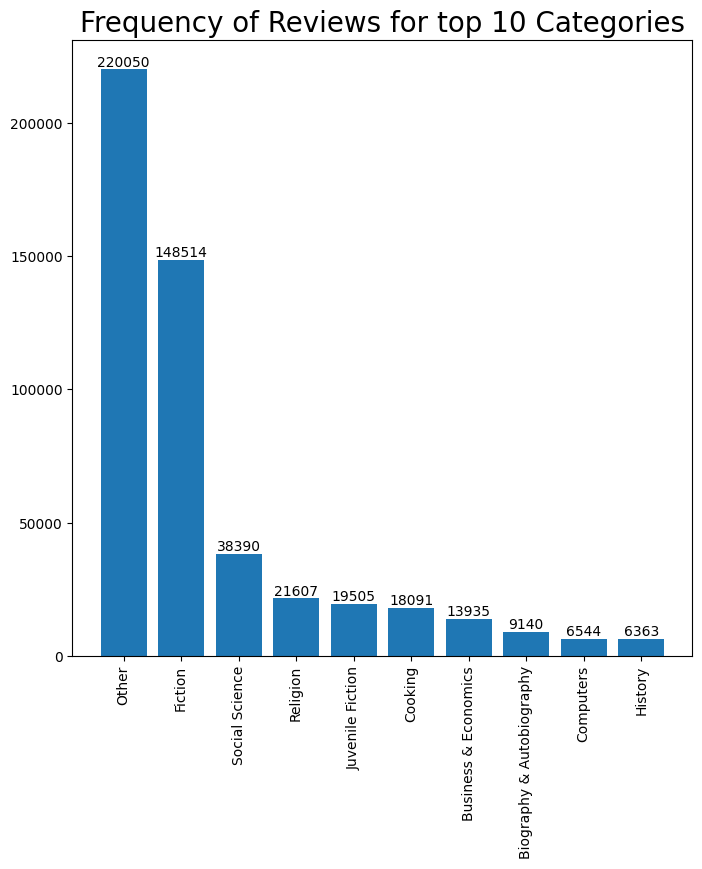

In [23]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_processed['categories'].explode().unique(), df_all_data_processed['categories'].explode().value_counts())
# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars)
plt.title('Frequency of Reviews for top 10 Categories', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

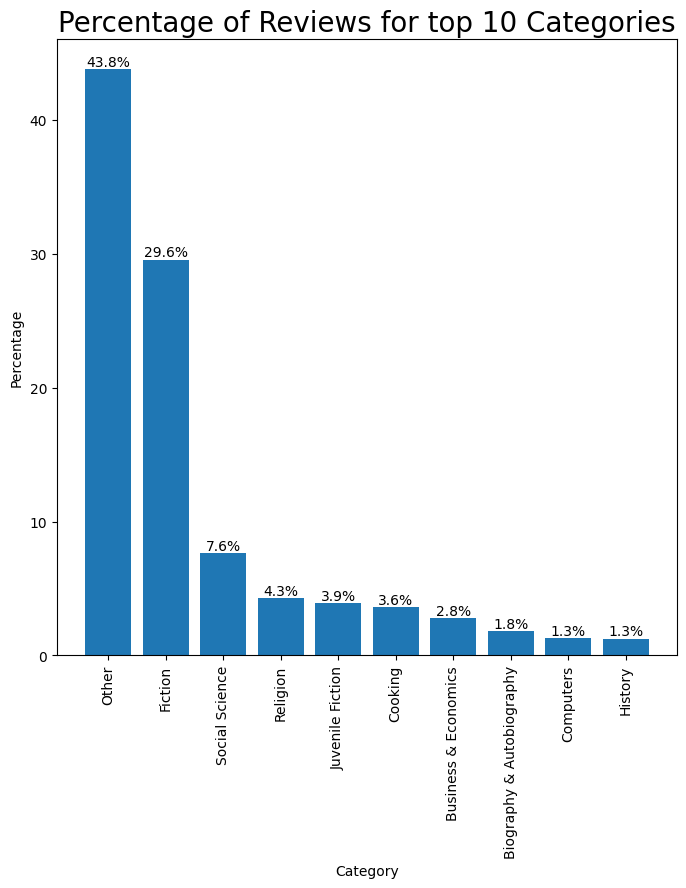

In [24]:
#Show a barplot by Percentages
category_percetage = df_all_data_processed['categories'].explode().value_counts()/df_all_data_processed['categories'].explode().value_counts().sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_processed['categories'].explode().unique(), category_percetage)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Category')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of Reviews for top 10 Categories', fontsize = 20)
plt.show()

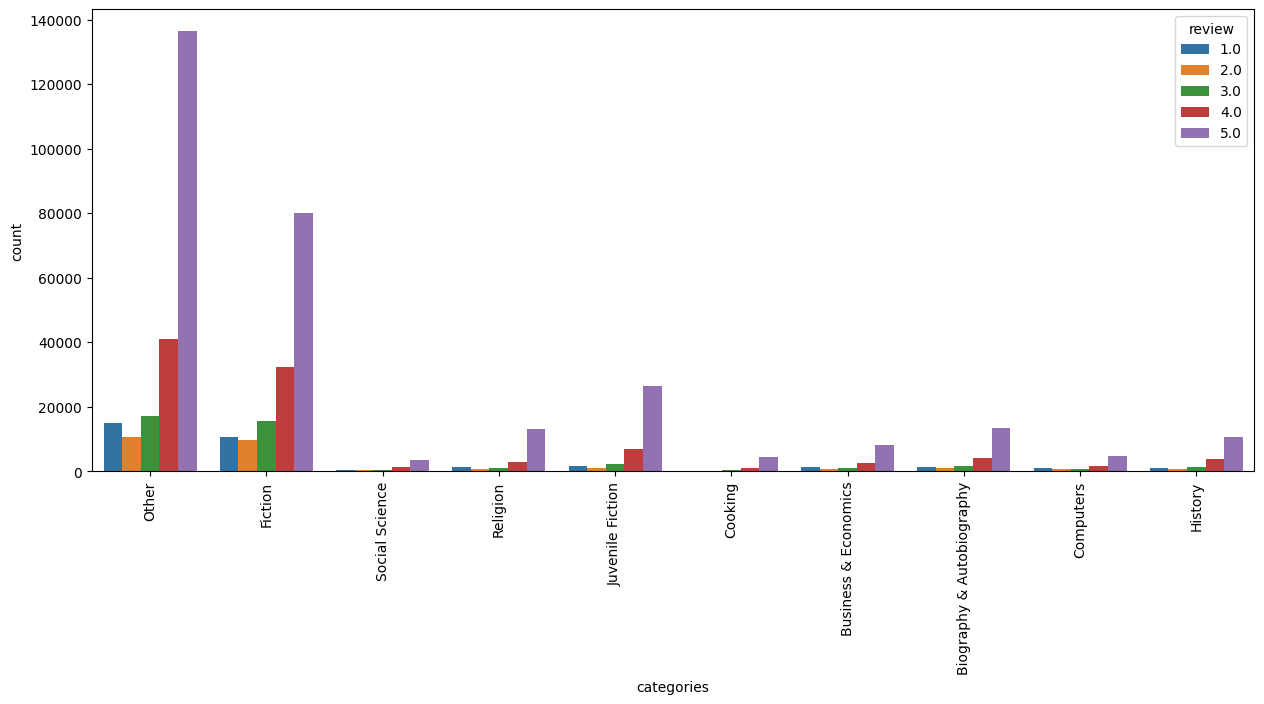

In [131]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_all_data_processed.explode('categories'), x = 'categories', hue='review')
plt.xticks(rotation=90)
plt.show()

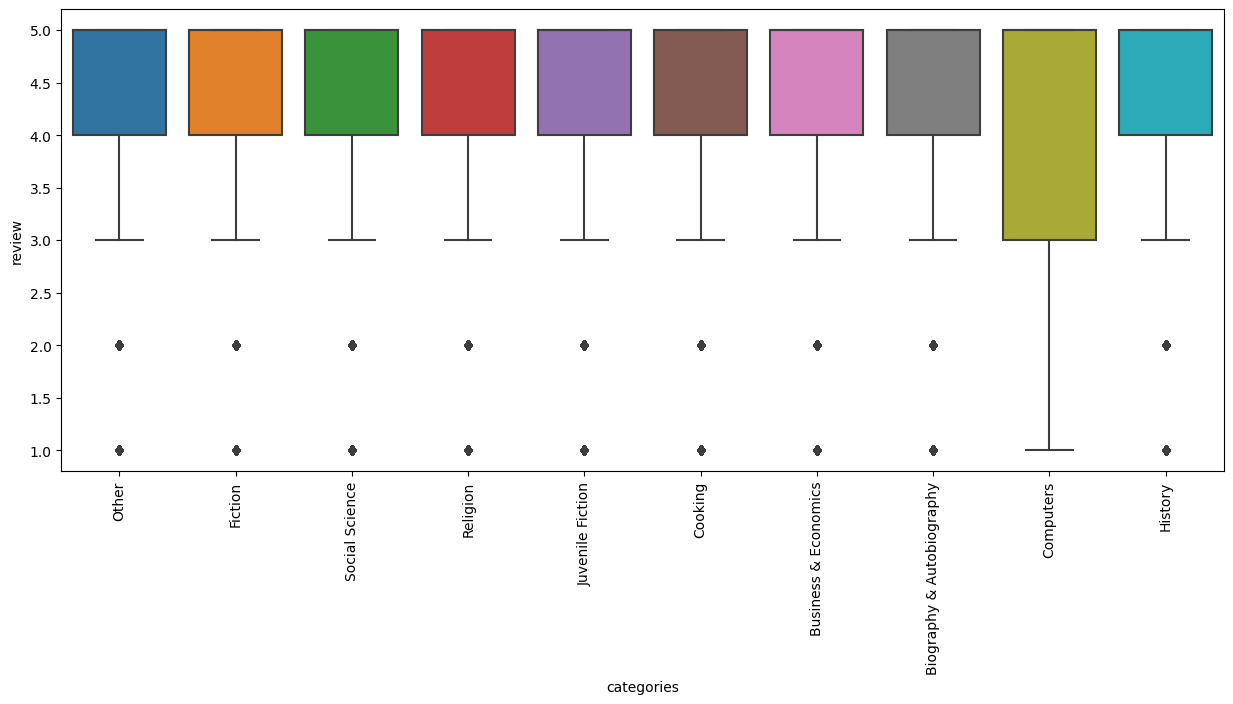

In [25]:
plt.figure(figsize=(15, 6))  # Set the figure size
sns.boxplot(x='categories', y='review', data=df_all_data_processed.explode('categories'))
plt.xticks(rotation=90)
plt.show()

In [26]:
df_all_data_processed['categories'].explode().unique()

array(['Other', 'Fiction', 'Social Science', 'Religion',
       'Juvenile Fiction', 'Cooking', 'Business & Economics',
       'Biography & Autobiography', 'Computers', 'History'], dtype=object)

### Key Findings for Categories:

- There are 10 different Categories in the Dataset.
- All of the reviewed categories contains reviews values in the 5 Categories [1, 2, 3, 4, 5]. All of the are biased to high review score.
- All categories but 'Computers' have lower quartile limit in Rating of 4 and minimum values of 3, but with outliers in 1 and 2 score reviews groups. 'Computers have the 25% quartile of 3 and minimum of 1.
- 'Fiction' is most rated category after grouped 'Others'. This category is biased to High review scores, having the mean on 4.5. And the 25% quartile on 4.

## Authors

In [27]:
authors = df_all_data_processed['authors'].explode()
authors.info()

<class 'pandas.core.series.Series'>
Index: 502906 entries, 0 to 502037
Series name: authors
Non-Null Count   Dtype 
--------------   ----- 
502906 non-null  object
dtypes: object(1)
memory usage: 7.7+ MB


In [28]:
print(f'Total of Authors: {len(authors.unique())}')

Total of Authors: 10


In [29]:
author_counts = authors.value_counts(ascending=False)
print(f'Total of entries after explode authors column {author_counts.sum()}')

Total of entries after explode authors column 502906


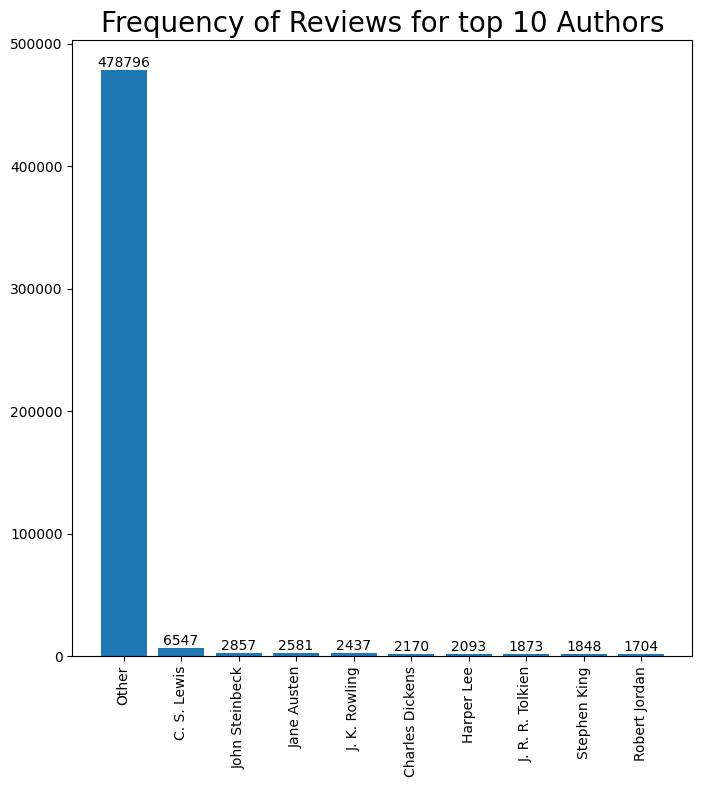

In [30]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_processed['authors'].explode().unique(), df_all_data_processed['authors'].explode().value_counts())
# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars)
plt.title('Frequency of Reviews for top 10 Authors', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

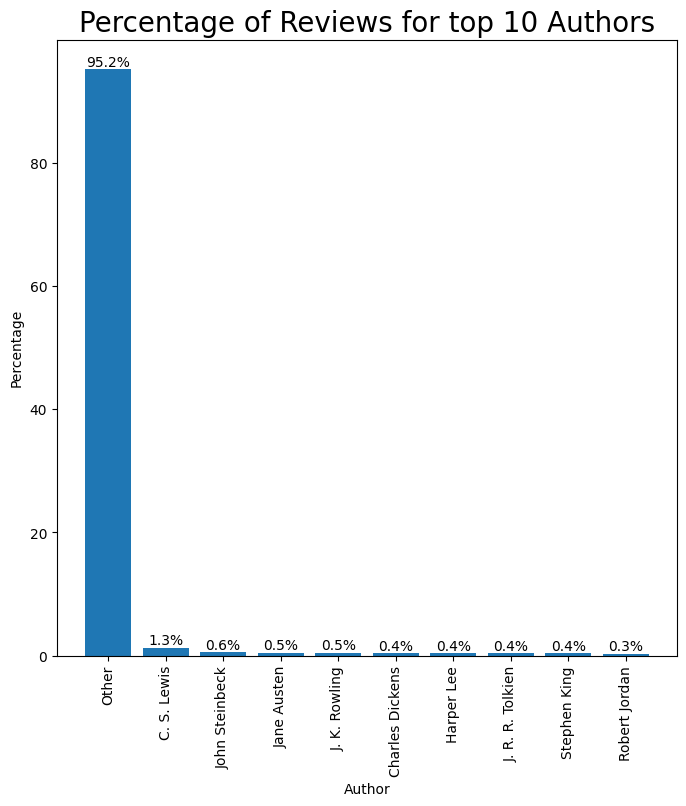

In [31]:
#Show a barplot by Percentages
author_percetage = df_all_data_processed['authors'].explode().value_counts()/df_all_data_processed['authors'].explode().value_counts().sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_processed['authors'].explode().unique(), author_percetage)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Author')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of Reviews for top 10 Authors', fontsize = 20)
plt.show()


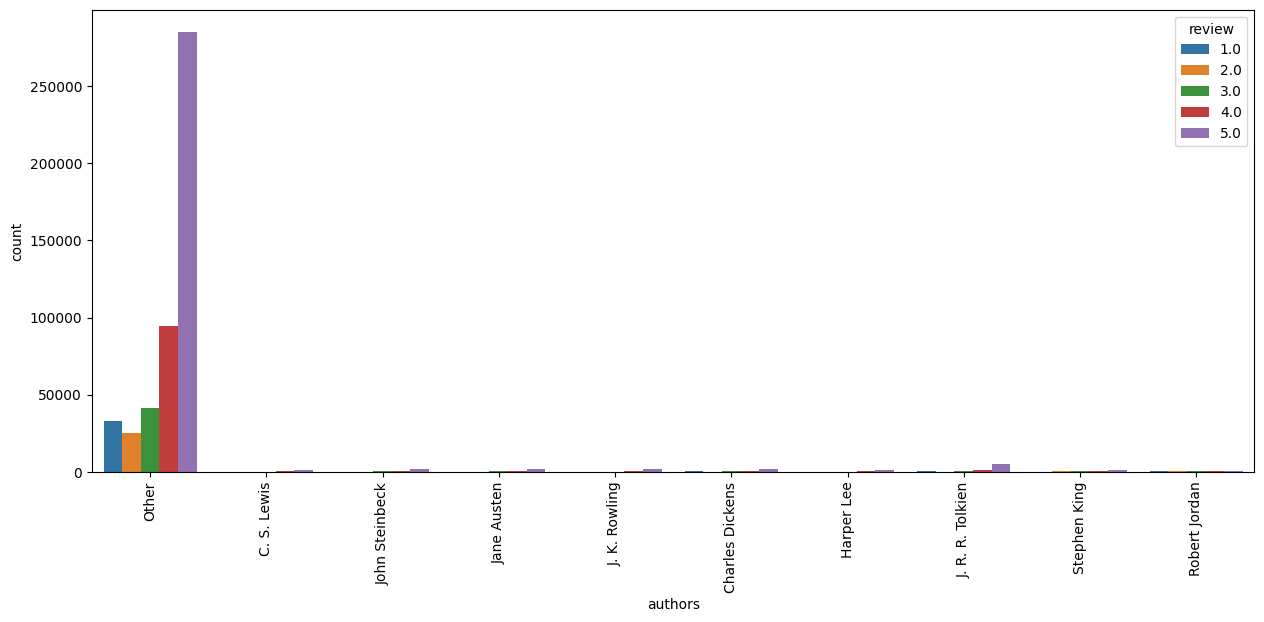

In [132]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_all_data_processed.explode('authors'), x = 'authors', hue='review')
plt.xticks(rotation=90)
plt.show()

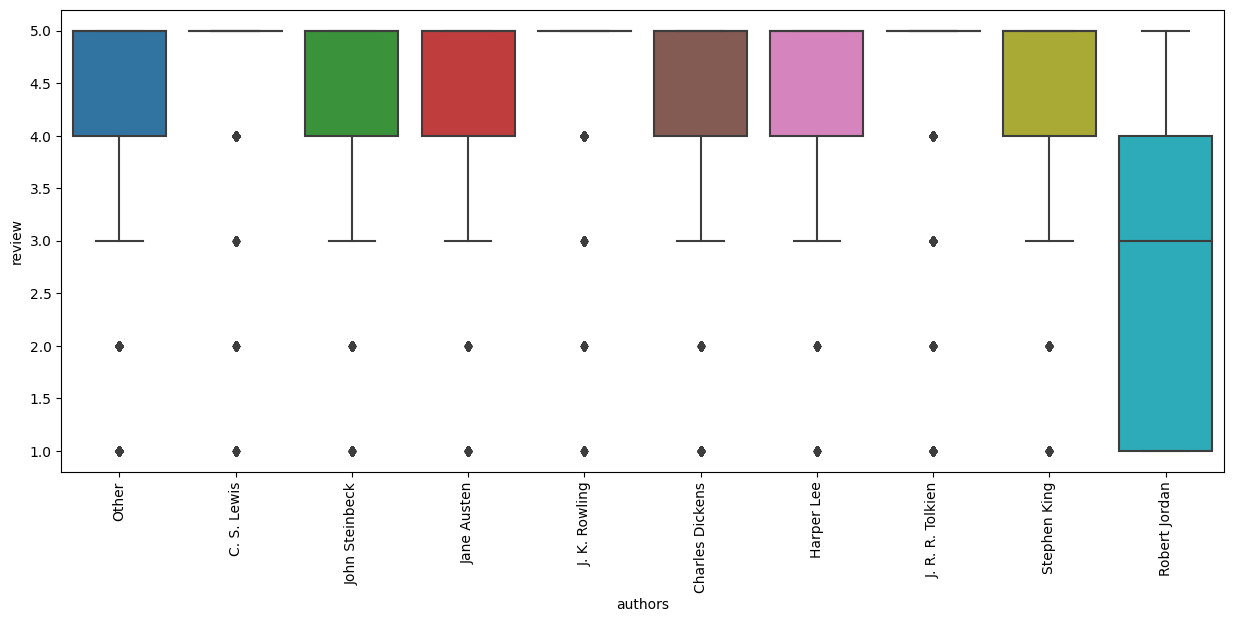

In [32]:
plt.figure(figsize=(15, 6)) 
sns.boxplot(x='authors', y='review', data=df_all_data_processed.explode('authors'))
plt.xticks(rotation=90)
plt.show()

### Key Findings for Authors

- All of the reviewed authors contains reviews values in the 5 review scores [1 , 2, 3, 4, 5]. All of the authors but Robert Jordan, are biased to high review score. J. R. R. Tolkien, J.K Rowling and C.S. Lewis show the 25%, 50% and 75% quartiles of 5 review score. Robert Jordan has a review score more balanced, with the median on 3 and de quartile 75% under 4.
- Others authors represent the 95.2% of the Dataset. 


## Published Year

In [33]:
pub_year = df_all_data_processed[['published_year','review']]
pub_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502038 entries, 0 to 502037
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   published_year  502038 non-null  int64  
 1   review          502038 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 7.7 MB


In [34]:
pub_year = pub_year.groupby('published_year')['review'].agg(['mean', 'count']).reset_index()
pub_year

,published_year,mean,count
0,101,4.066667,15
1,1016,1.000000,1
2,1580,4.066667,15
3,1581,5.000000,1
4,1598,4.526316,19
...,...,...,...
277,2019,4.240392,8274
278,2020,4.265424,8850
279,2021,4.202281,9645
280,2022,4.200569,2812


In [35]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145224193')

In [36]:
pub_year = pub_year[pub_year['published_year']>pd.Timestamp.min.year]

In [37]:
pub_year['published_year'].describe().T

count     268.000000
mean     1884.328358
std        86.269396
min      1682.000000
25%      1822.750000
50%      1889.500000
75%      1956.250000
max      2023.000000
Name: published_year, dtype: float64

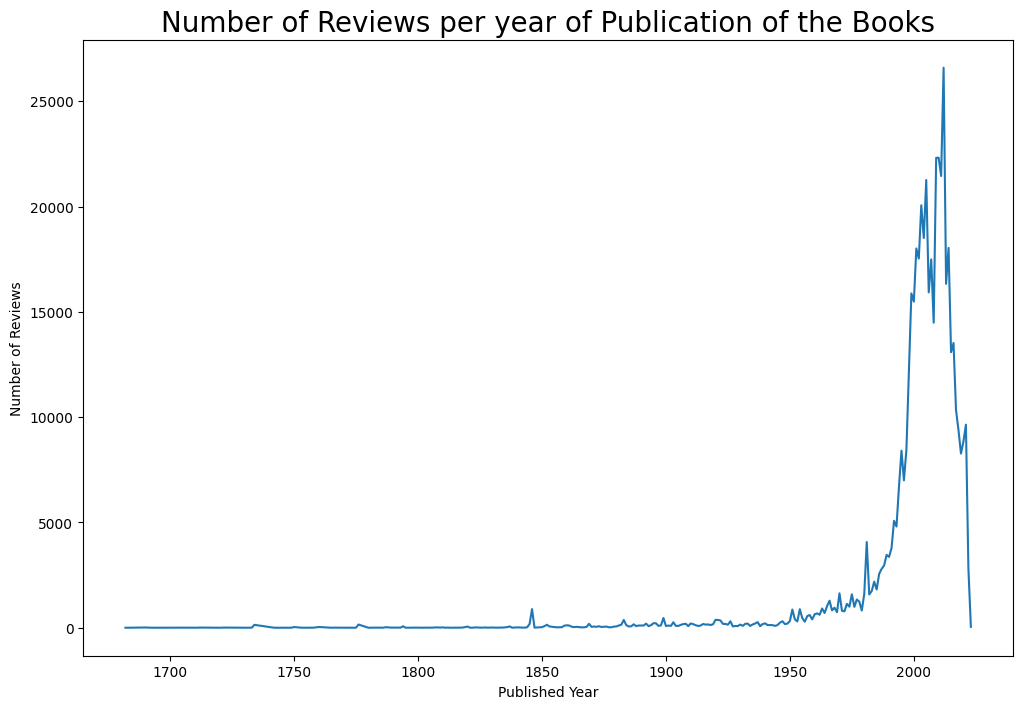

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(pub_year['published_year'], pub_year['count'], linestyle='-')
plt.xlabel('Published Year')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per year of Publication of the Books', fontsize = 20)
plt.show()

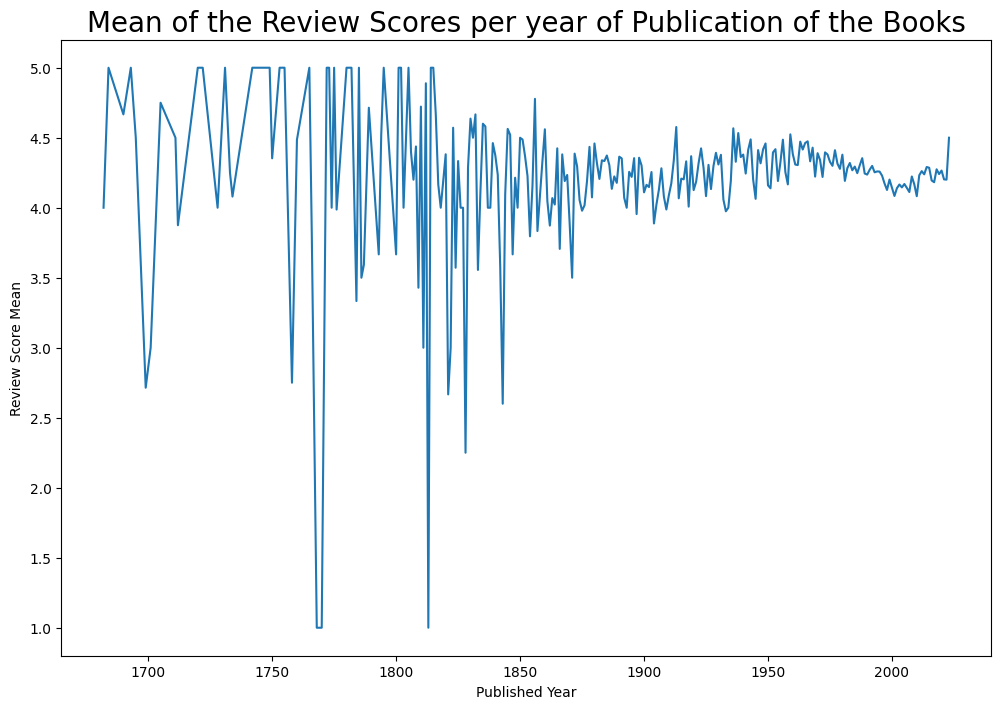

In [39]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(pub_year['published_year'], pub_year['mean'], linestyle='-')
plt.xlabel('Published Year')
plt.ylabel('Review Score Mean')
plt.title('Mean of the Review Scores per year of Publication of the Books', fontsize = 20)
plt.show()

In [40]:
pub_year_counts = df_all_data_processed['published_year'].value_counts(ascending=False)
top_10_pub_year_counts = pub_year_counts[:10].sort_values(ascending=False)
top_10_pub_year_counts

published_year
2012    26599
2010    22324
2009    22319
2011    21456
2005    21265
2003    20065
2004    18511
2014    18041
2001    18014
2002    17535
Name: count, dtype: int64

In [41]:
other_pub_year_counts = pub_year_counts[10:].sum()
other_pub_year_counts

295909

In [42]:
top_pub_year_with_other = pd.concat([top_10_pub_year_counts, pd.Series({'Other': other_pub_year_counts})])
top_pub_year_with_other = top_pub_year_with_other.groupby(top_pub_year_with_other.index).sum()
top_pub_year_with_other = top_pub_year_with_other.sort_values(ascending=False)
top_pub_year_with_other

Other    295909
2012      26599
2010      22324
2009      22319
2011      21456
2005      21265
2003      20065
2004      18511
2014      18041
2001      18014
2002      17535
dtype: int64

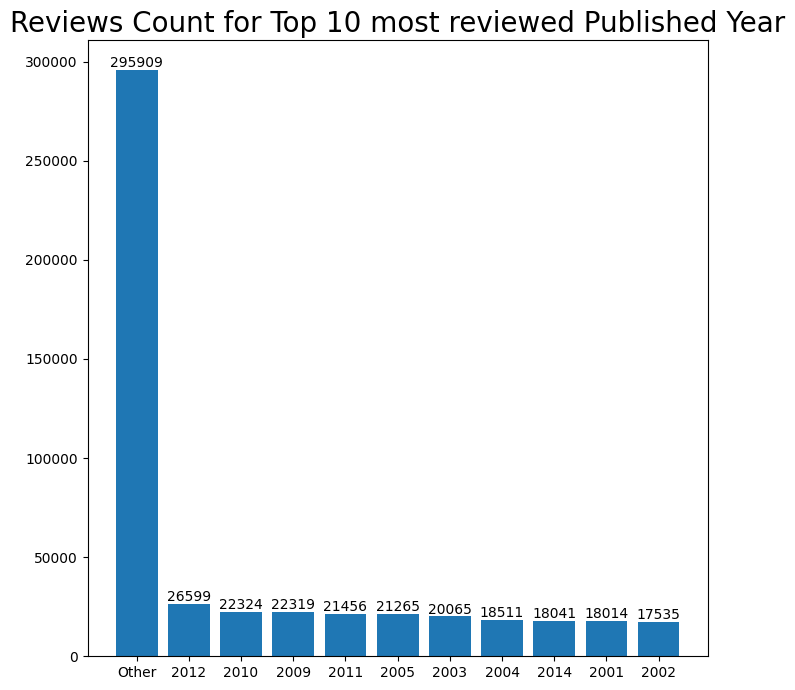

In [43]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(top_pub_year_with_other.keys().map(str), top_pub_year_with_other)
ax.bar_label(bars)
plt.title('Reviews Count for Top 10 most reviewed Published Year', fontsize = 20)
plt.show()

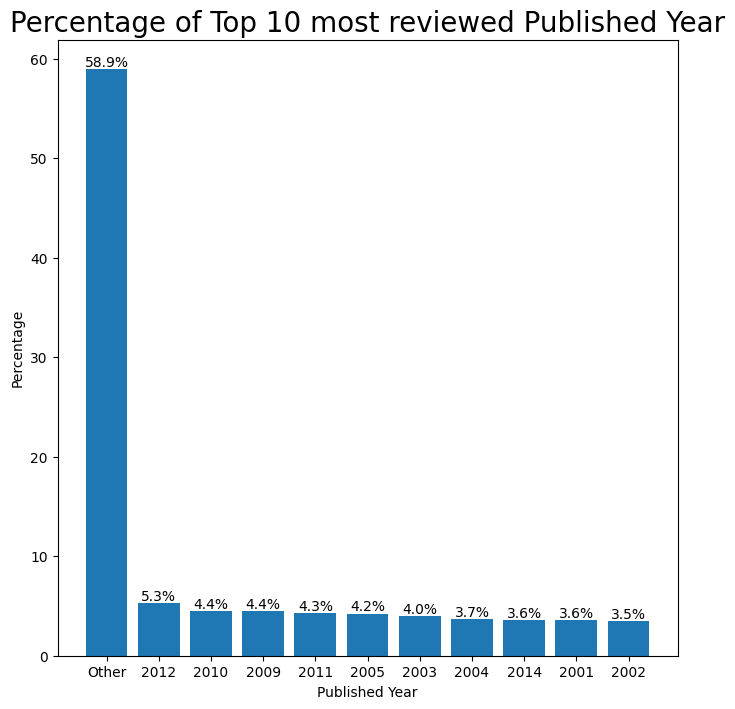

In [44]:
#Show a barplot by Percentages
pub_year_percetage = top_pub_year_with_other/pub_year_counts.sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(top_pub_year_with_other.keys().map(str), pub_year_percetage)

ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Published Year')
plt.ylabel('Percentage')
plt.title('Percentage of Top 10 most reviewed Published Year', fontsize = 20)
plt.show()

In [45]:
top_10_pub_year_counts.keys().to_list()

[2012, 2010, 2009, 2011, 2005, 2003, 2004, 2014, 2001, 2002]

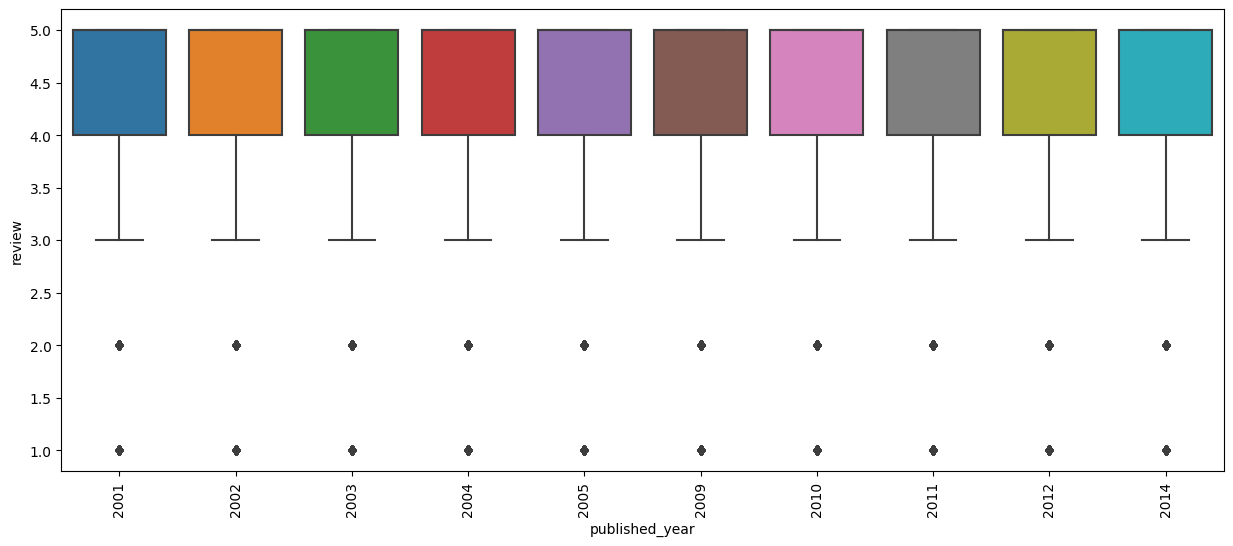

In [46]:
boxplot_published_year = df_all_data_processed[df_all_data_processed['published_year'].isin(top_10_pub_year_counts.keys().to_list())]

plt.figure(figsize=(15, 6)) 
sns.boxplot(x='published_year', y='review', data=boxplot_published_year)
plt.xticks(rotation=90)
plt.show()

In [47]:
df_all_data_processed[['published_year', 'review']].corr().style.background_gradient(cmap='Blues')

,published_year,review
published_year,1.000000,-0.012494
review,-0.012494,1.000000


In [48]:
df_all_data_processed[df_all_data_processed['published_year'] == 2012].sample(10)

,authors,categories,publisher,published_year,review_year,helpfulness,text_clean,compound_sentiment,review
470253,[Other],[Other],Other,2012,2002,1.000000,novice experienced book offers triathletes nee...,0.9460,5.0
237338,[Other],[Fiction],Other,2012,2006,0.750000,long time reader patricia cornwells work im to...,0.7722,1.0
212357,[Other],[Religion],Other,2012,2006,0.024242,classic case buffet style bible reading well g...,-0.5106,1.0
364654,[J. R. R. Tolkien],[Fiction],HarperCollins,2012,2002,0.000000,fine rendering gets pronunciations proper name...,0.9754,5.0
496792,[Other],[Juvenile Fiction],Simon and Schuster,2012,2005,1.000000,excellent piece childrens literature moral iss...,0.9245,5.0
347029,[Other],[Fiction],Other,2012,2006,0.800000,come lucky jim kingsley amis usually thay hear...,0.9960,5.0
192590,[Other],[Other],Other,2012,1998,1.000000,fahrenheit book highly recommend particularly...,0.9377,5.0
237471,[J. R. R. Tolkien],[Juvenile Fiction],Other,2012,2013,1.000000,like type stories book exceeded expectations t...,-0.1027,4.0
347850,[Other],[Other],Other,2012,2008,0.666667,one better kanji books come across quite good ...,0.9600,3.0
462301,[Other],[Social Science],Other,2012,1998,1.000000,readers thompsons later works find distinct ch...,0.4767,5.0


### Key Findings for Published Year

- The Top 10 published year with most reviews are 2012, 2010, 2009, 2011, 2005, 2003, 2004, 2014, 2001 and 2002. All of the reviews for this top 10 years, are biased to high scores. Having the quartile 25% above 4.
- The books published during the first decade of 2000's cover almost the 41.1% of the Total Dataset Reviews.
- The mean of the review score is stable between 4 and 4.5 for the books pusblished after 1900. The mean of the review for books published before 1850 is not stable, it changes on all the range for review score [1-5].


## Helpfulness

In [49]:
df_all_data_processed.sample(2)

,authors,categories,publisher,published_year,review_year,helpfulness,text_clean,compound_sentiment,review
220711,[Other],[Other],Other,1997,2000,0.5,found book pretty helpfull partbut doesnt give...,0.8402,3.0
197564,[Harper Lee],[Other],Other,1970,1998,1.0,book opinion mockingbirds never never consider...,0.9793,5.0


In [50]:
df_all_data_processed['helpfulness'].describe().T

count    502038.000000
mean          0.789835
std           0.317509
min           0.000000
25%           0.666667
50%           1.000000
75%           1.000000
max           1.000000
Name: helpfulness, dtype: float64

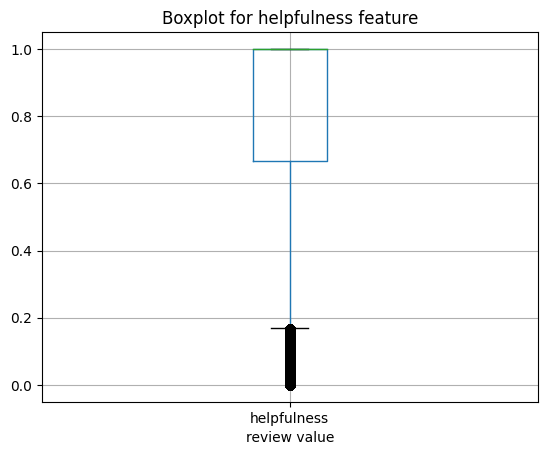

In [51]:
#Create a box plot to check for outliers, median and quartiles 4/6 0/0 1/3 5/5
df_all_data_processed.boxplot(column='helpfulness')
plt.xlabel("review value")
plt.title("Boxplot for helpfulness feature")
plt.show()

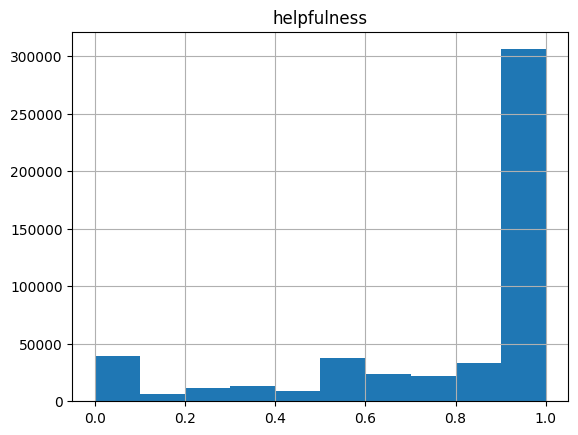

In [52]:
df_all_data_processed.hist(column='helpfulness')
plt.show()

In [53]:
#Correlation Analysis 
df_all_data_processed[['helpfulness','review']].corr().style.background_gradient(cmap='Blues')

,helpfulness,review
helpfulness,1.000000,0.302751
review,0.302751,1.000000


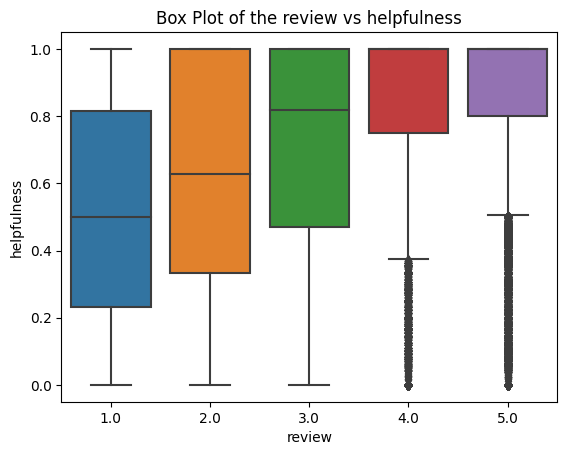

In [54]:
sns.boxplot(x='review', y='helpfulness', data=df_all_data_processed)
plt.xlabel('review')
plt.ylabel('helpfulness')
plt.title('Box Plot of the review vs helpfulness')
plt.show()

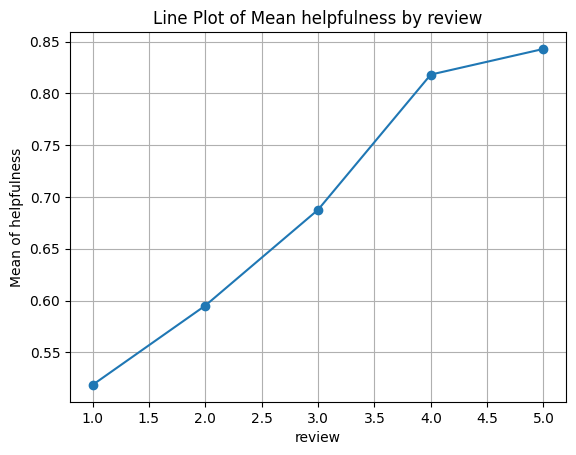

In [55]:
helpfulness_by_review = df_all_data_processed.groupby('review')['helpfulness'].mean()

helpfulness_by_review.plot(kind='line', marker='o', linestyle='-')
plt.xlabel('review')
plt.ylabel('Mean of helpfulness')
plt.title('Line Plot of Mean helpfulness by review')
plt.grid(True)
plt.show()

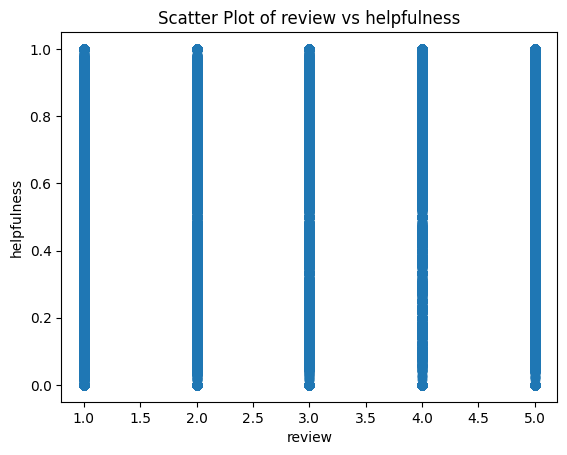

In [56]:
plt.scatter(df_all_data_processed['review'], df_all_data_processed['helpfulness'], alpha=0.5)
plt.xlabel('review')
plt.ylabel('helpfulness')
plt.title('Scatter Plot of review vs helpfulness')
plt.show()

### Key Findings for helpfulness

- Reviews with a high review score are found more helpfull than reviews with low review score.
- Mean of the helpfulness and review have a linear relationship.


## Review_Year

In [57]:
rev_year = df_all_data_processed[['review_year','review']]
rev_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502038 entries, 0 to 502037
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_year  502038 non-null  int64  
 1   review       502038 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 7.7 MB


In [58]:
rev_year = rev_year.groupby('review_year')['review'].agg(['mean', 'count']).reset_index()
rev_year

,review_year,mean,count
0,1995,4.680851,47
1,1996,4.613153,1034
2,1997,4.513756,6906
3,1998,4.341355,20445
4,1999,4.210115,36937
5,2000,4.216685,38369
6,2001,4.194412,32066
7,2002,4.161582,31272
8,2003,4.115762,30485
9,2004,4.088939,30830


In [59]:
rev_year['review_year'].describe().T

count      19.000000
mean     2004.000000
std         5.627314
min      1995.000000
25%      1999.500000
50%      2004.000000
75%      2008.500000
max      2013.000000
Name: review_year, dtype: float64

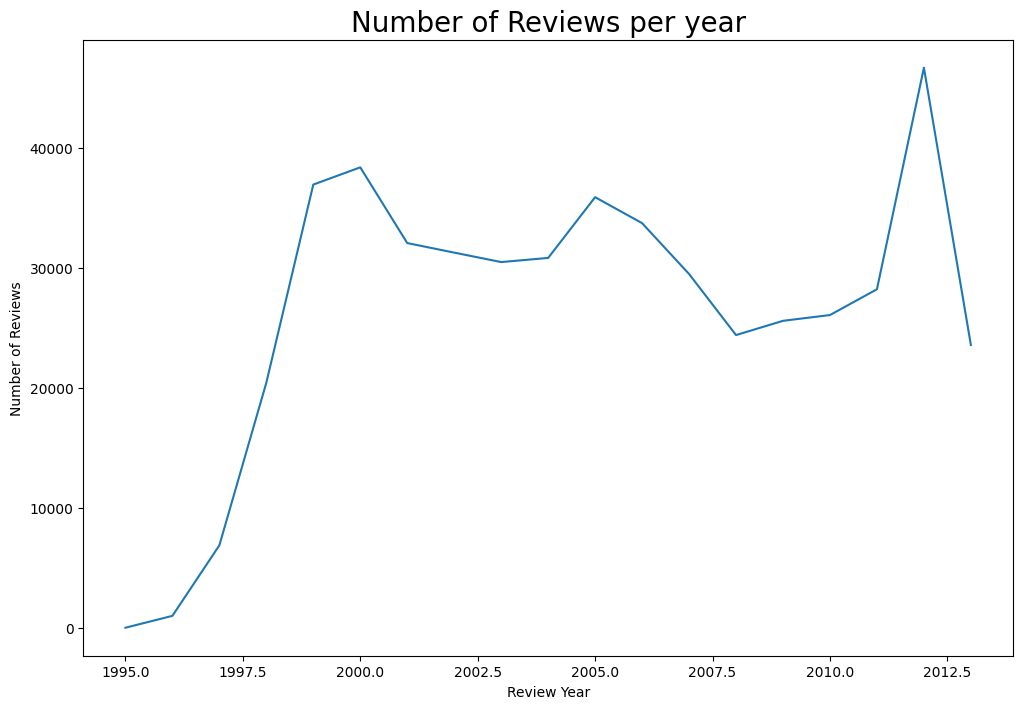

In [60]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(rev_year['review_year'], rev_year['count'], linestyle='-')
plt.xlabel('Review Year')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per year', fontsize = 20)
plt.show()

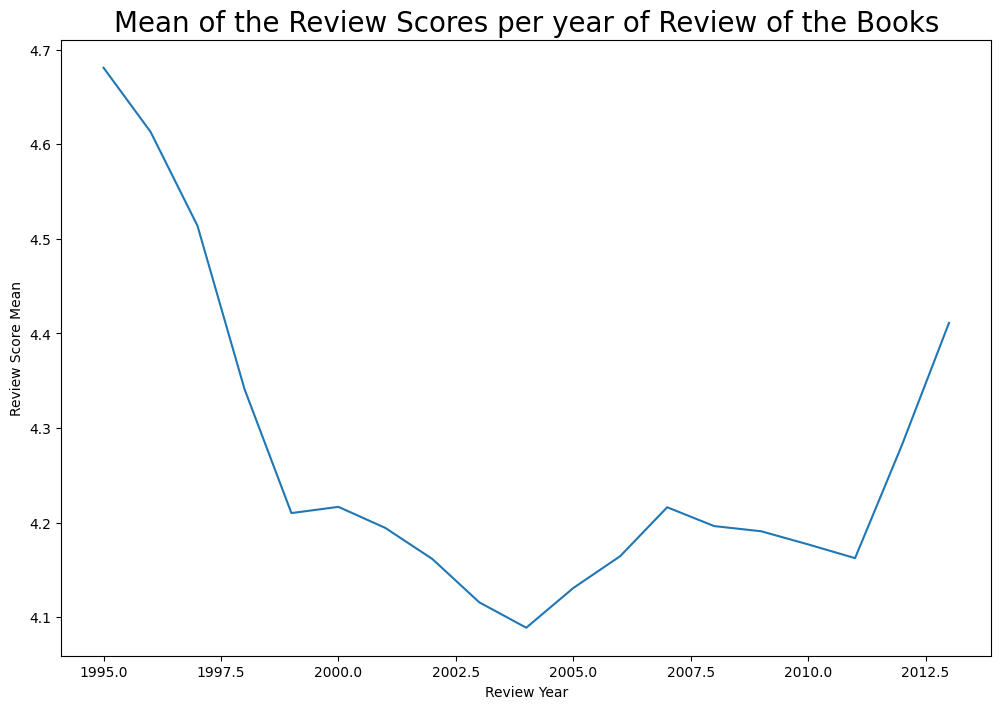

In [61]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(rev_year['review_year'], rev_year['mean'], linestyle='-')
plt.xlabel('Review Year')
plt.ylabel('Review Score Mean')
plt.title('Mean of the Review Scores per year of Review of the Books', fontsize = 20)
plt.show()

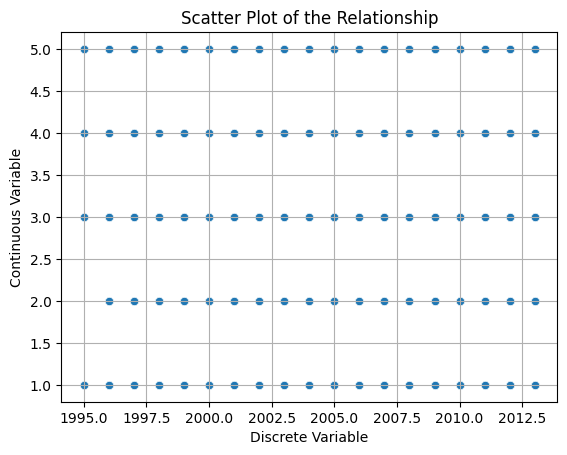

In [62]:
sns.scatterplot(x='review_year', y='review', data=df_all_data_processed)
plt.xlabel('Discrete Variable')
plt.ylabel('Continuous Variable')
plt.title('Scatter Plot of the Relationship')
plt.grid(True)
plt.show()

In [63]:
df_all_data_processed[['review_year', 'review']].corr().style.background_gradient(cmap='Blues')

,review_year,review
review_year,1.000000,0.007362
review,0.007362,1.000000


In [64]:
review_year_counts = df_all_data_processed['review_year'].value_counts(ascending=False)
top_10_review_year_counts = review_year_counts[:10].sort_values(ascending=False)
top_10_review_year_counts

review_year
2012    46663
2000    38369
1999    36937
2005    35886
2006    33725
2001    32066
2002    31272
2004    30830
2003    30485
2007    29492
Name: count, dtype: int64

In [65]:
other_review_year_counts = review_year_counts[10:].sum()
other_review_year_counts

156313

In [66]:
top_review_year_with_other = pd.concat([top_10_review_year_counts, pd.Series({'Other': other_review_year_counts})])
top_review_year_with_other = top_review_year_with_other.groupby(top_review_year_with_other.index).sum()
top_review_year_with_other = top_review_year_with_other.sort_values(ascending=False)
top_review_year_with_other

Other    156313
2012      46663
2000      38369
1999      36937
2005      35886
2006      33725
2001      32066
2002      31272
2004      30830
2003      30485
2007      29492
dtype: int64

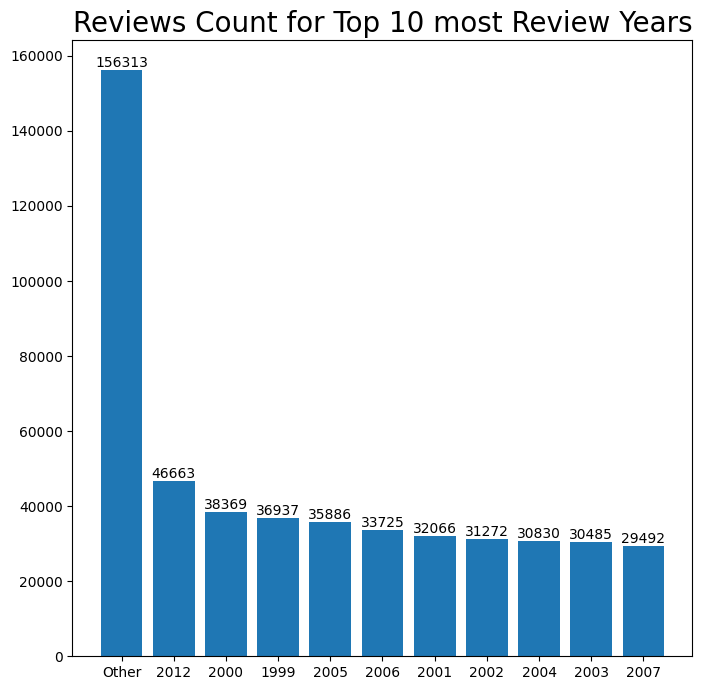

In [67]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(top_review_year_with_other.keys().map(str), top_review_year_with_other)
ax.bar_label(bars)
plt.title('Reviews Count for Top 10 most Review Years', fontsize = 20)
plt.show()

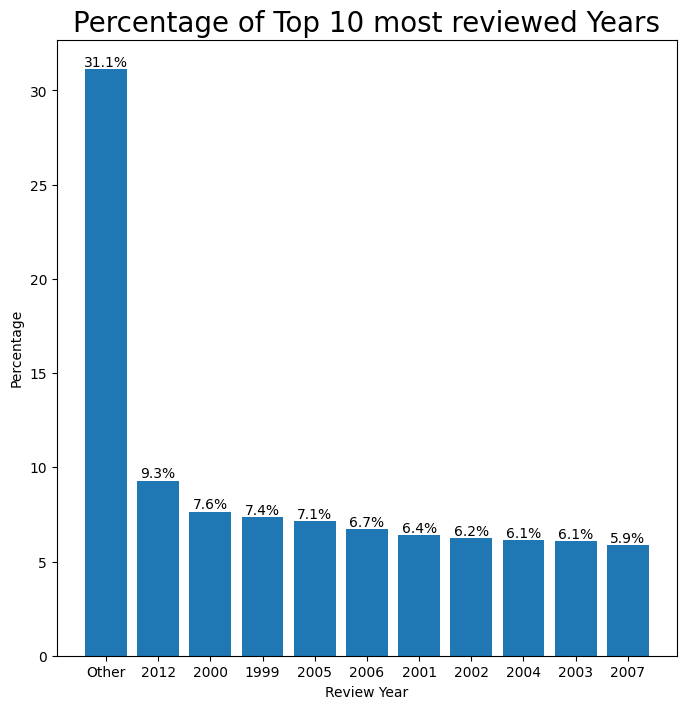

In [68]:
#Show a barplot by Percentages
review_year_percetage = top_review_year_with_other/review_year_counts.sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(top_review_year_with_other.keys().map(str), review_year_percetage)

ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Review Year')
plt.ylabel('Percentage')
plt.title('Percentage of Top 10 most reviewed Years', fontsize = 20)
plt.show()

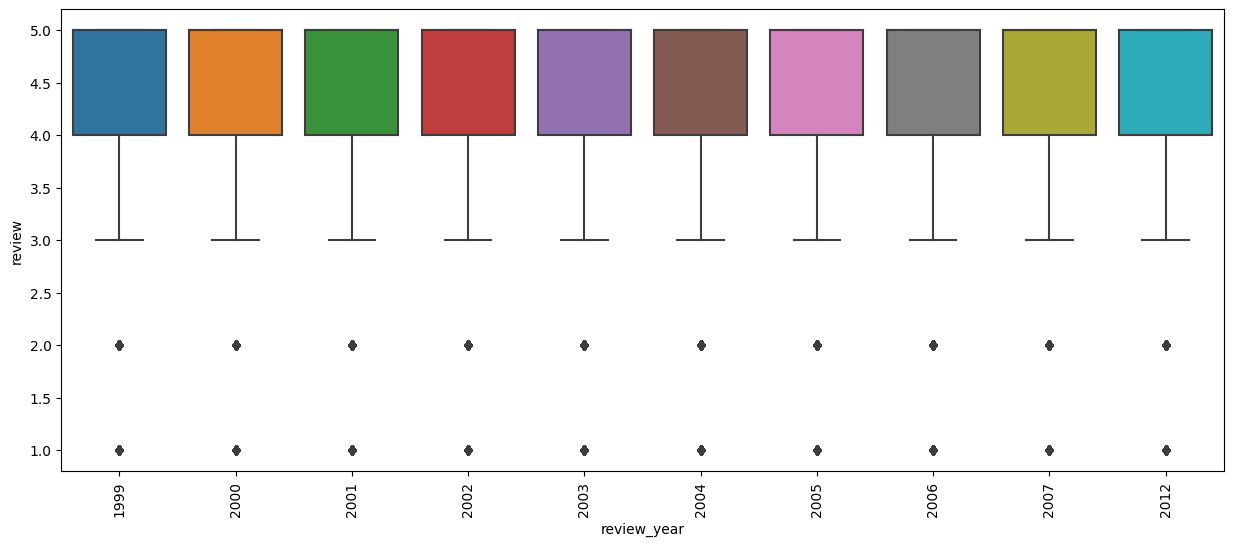

In [69]:
boxplot_review_year_df = df_all_data_processed[df_all_data_processed['review_year'].isin(top_10_review_year_counts.keys().to_list())]

plt.figure(figsize=(15, 6)) 
sns.boxplot(x='review_year', y='review', data=boxplot_review_year_df)
plt.xticks(rotation=90)
plt.show()

In [70]:
top_10_review_year_counts.keys()

Index([2012, 2000, 1999, 2005, 2006, 2001, 2002, 2004, 2003, 2007], dtype='int64', name='review_year')

### Key Findings for Review Year
- Top 10 years where most reviews where performed on Amazon Books are 2012, 2000, 1999, 2005, 2006, 2001, 2002, 2004, 2003 and 2007.
- The Review score for all of the top 10v years is biased to high scores. Having the 25% Quartile above 4. And the median on 5.

## Publisher

In [71]:
df_all_data_processed.sample(2)

,authors,categories,publisher,published_year,review_year,helpfulness,text_clean,compound_sentiment,review
228023,[Other],[Biography & Autobiography],Vintage,2005,2004,1.000000,think ellis best book washington fascinating c...,0.9788,5.0
191558,[Other],[Business & Economics],Other,2005,2006,0.363636,book hits hard but gives corporate person keys...,0.9797,5.0


In [137]:
df_all_data_processed['publisher'] = pd.Categorical(df_all_data_processed['publisher'])

In [138]:
print(f'Total of Publishers: {len(df_all_data_processed["publisher"].unique())}')

Total of Publishers: 10


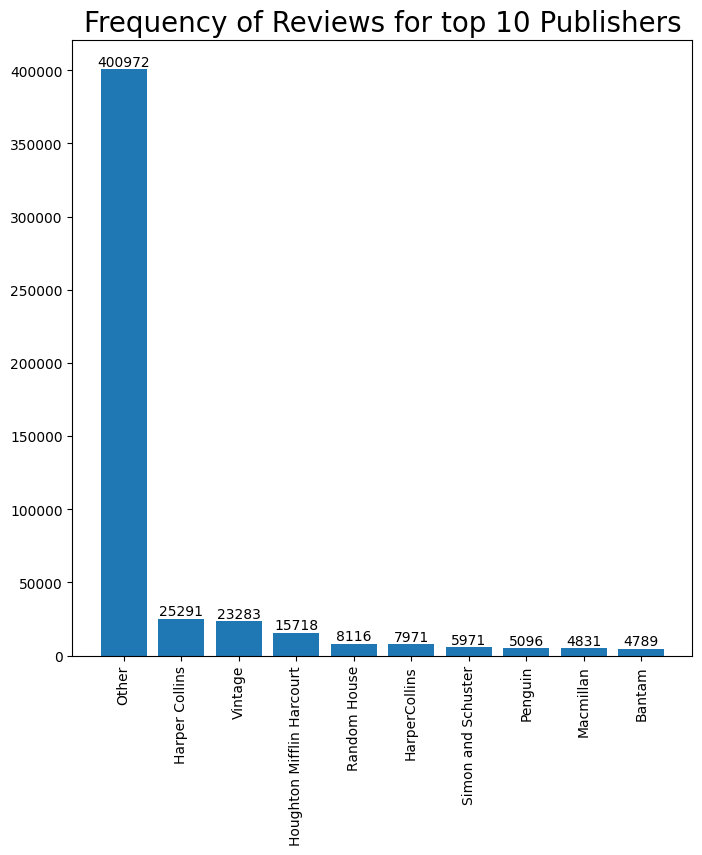

In [139]:
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_processed['publisher'].unique(), df_all_data_processed['publisher'].value_counts())
# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars)
plt.title('Frequency of Reviews for top 10 Publishers', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

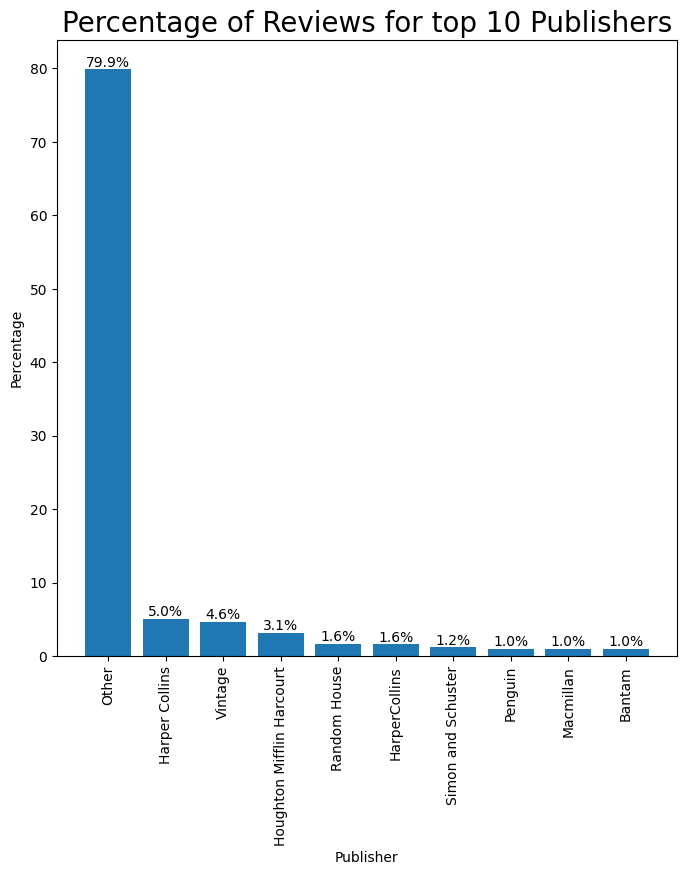

In [74]:
#Show a barplot by Percentages
author_percetage = df_all_data_processed['publisher'].value_counts()/df_all_data_processed['publisher'].value_counts().sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_all_data_processed['publisher'].unique(), author_percetage)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Publisher')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of Reviews for top 10 Publishers', fontsize = 20)
plt.show()


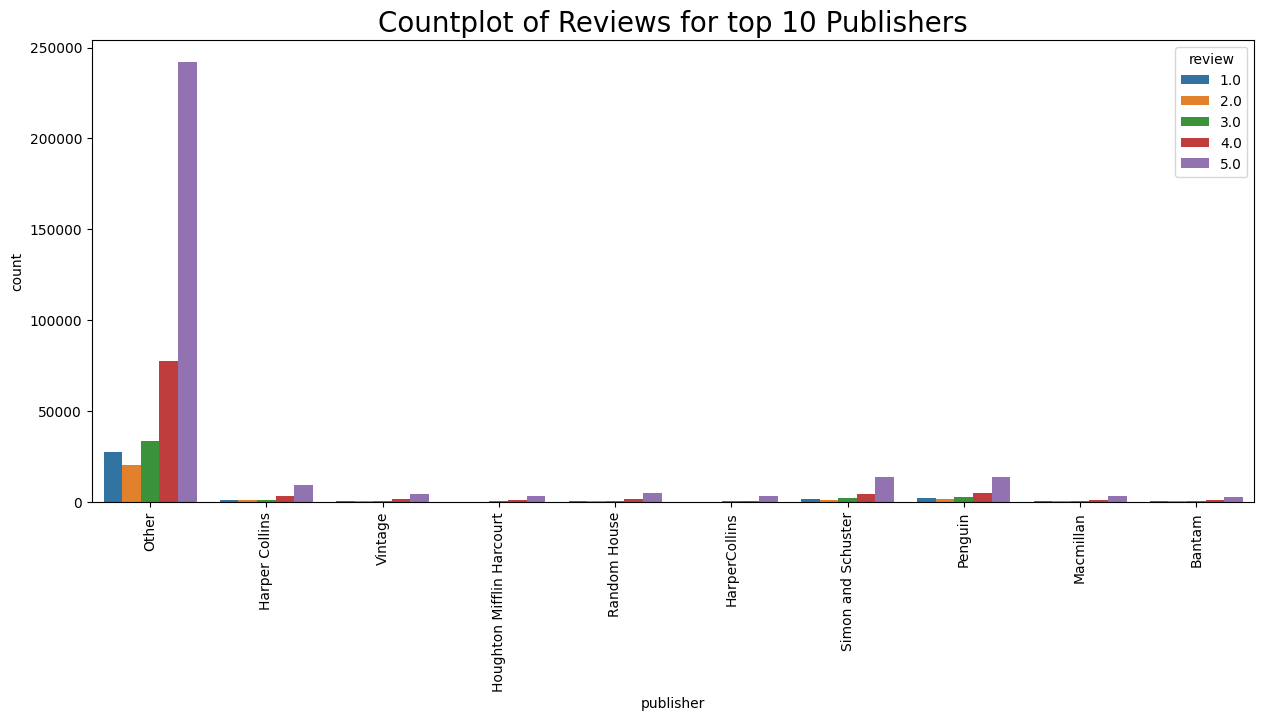

In [135]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_all_data_processed, x = 'publisher', hue='review')
plt.title('Countplot of Reviews for top 10 Publishers', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

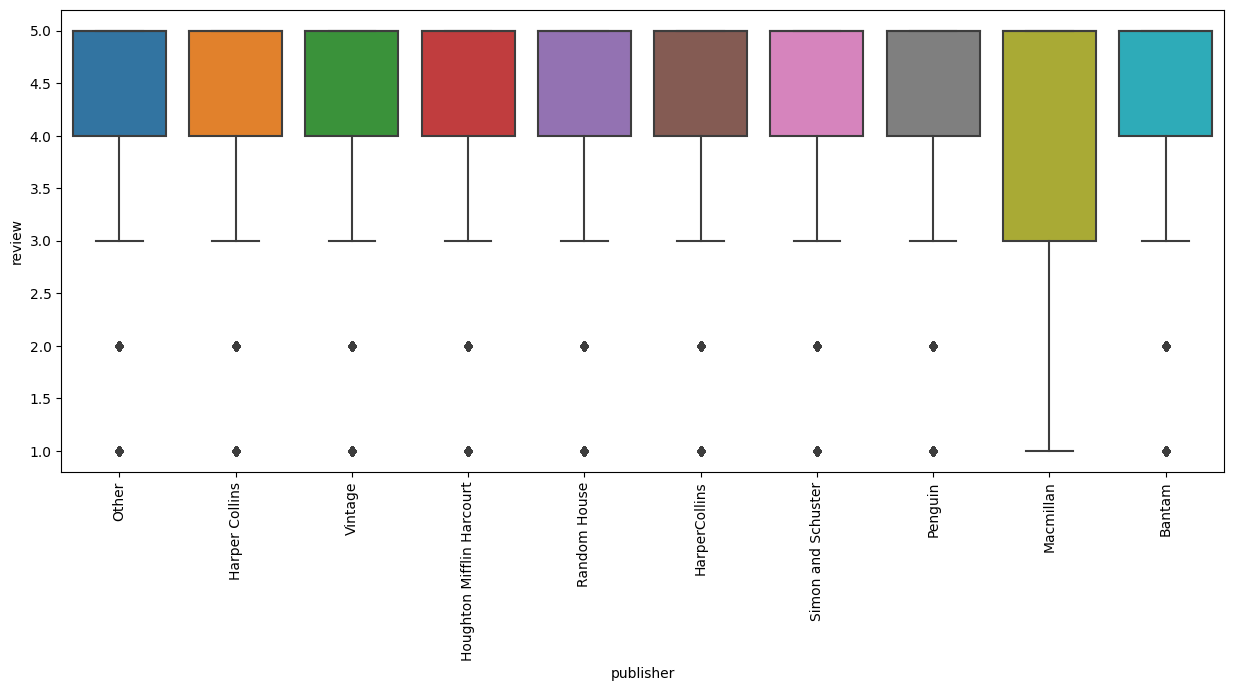

In [75]:
plt.figure(figsize=(15, 6)) 
sns.boxplot(x='publisher', y='review', data=df_all_data_processed)
plt.xticks(rotation=90)
plt.show()

### Key Findings for Publisher

- All of the Top Publishers have a Review Score biased to high values. All of them but Macmillan have the 25% percentile above 4. Having the median value and 75% percentile on 5. 
- All of the Publishers have values on the 5 possible review scores. As it contains valid variability, this feature is kept.

## Compound Sentiment

This variable is the result of applying vader lexicon with NLTK library to the cleaned text review from the Dataset.

In [76]:
df_all_data_processed.sample(2)

,authors,categories,publisher,published_year,review_year,helpfulness,text_clean,compound_sentiment,review
45331,[Other],[Other],Other,2008,2010,1.0,book moving exciting sad insightful excellent ...,0.5859,5.0
37400,[Other],[Fiction],Other,2009,1999,1.0,clever broad comedy stifling belly laughs ever...,0.9092,5.0


In [77]:
df_all_data_processed['compound_sentiment'].describe().T

count    502038.000000
mean          0.602041
std           0.541155
min          -1.000000
25%           0.510600
50%           0.855500
75%           0.952500
max           1.000000
Name: compound_sentiment, dtype: float64

compound_sentiment range goes from -1 to 1. As more near is the value to 1, more positive is the sentiment extracted from the text. And as more near to -1 is the value,
more negative is the sentiment predicted from the value.

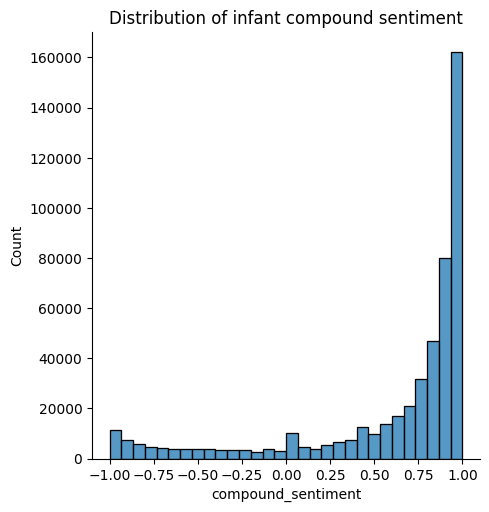

In [92]:
sns.displot(df_all_data_processed['compound_sentiment'], bins=30)

plt.title('Distribution of infant compound sentiment')

plt.show()

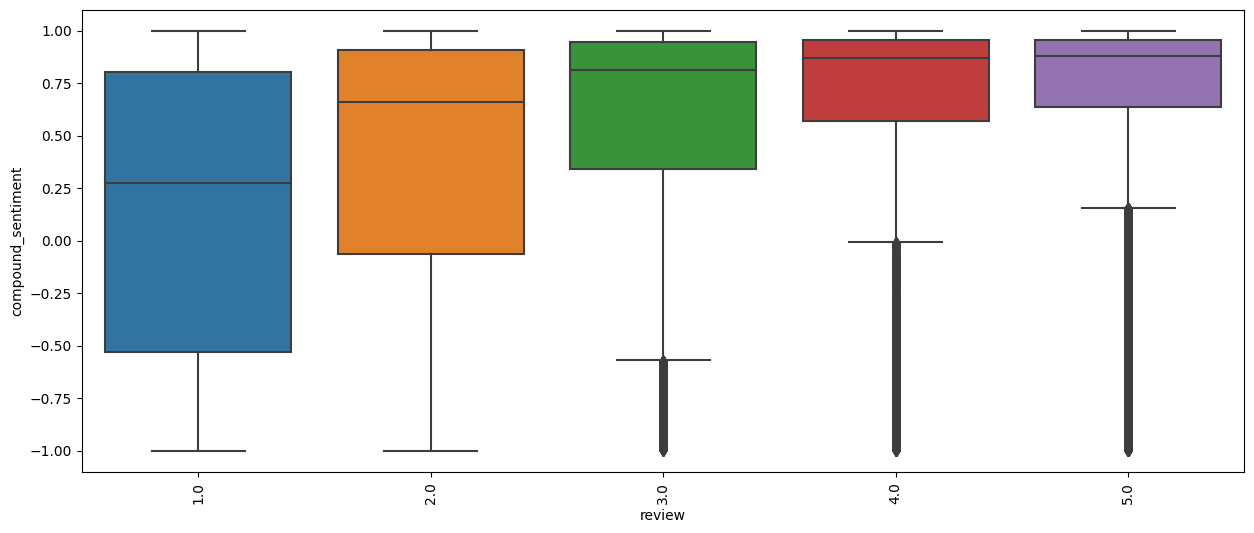

In [78]:
plt.figure(figsize=(15, 6)) 
sns.boxplot(x='review', y='compound_sentiment', data=df_all_data_processed)
plt.xticks(rotation=90)
plt.show()

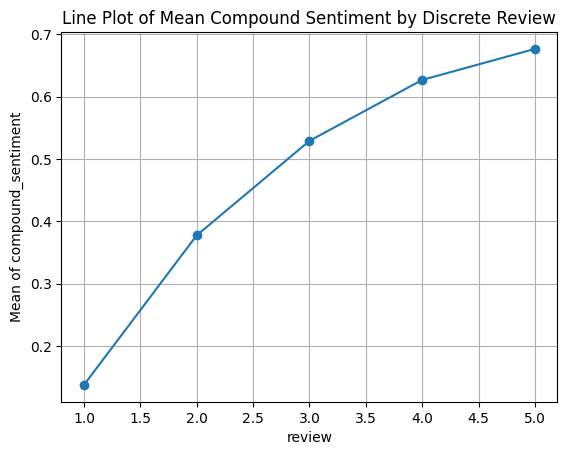

In [81]:
mean_by_review = df_all_data_processed.groupby('review')['compound_sentiment'].mean()
mean_by_review.plot(kind='line', marker='o', linestyle='-')
plt.xlabel('review')
plt.ylabel('Mean of compound_sentiment')
plt.title('Line Plot of Mean Compound Sentiment by Discrete Review')
plt.grid(True)
plt.show()

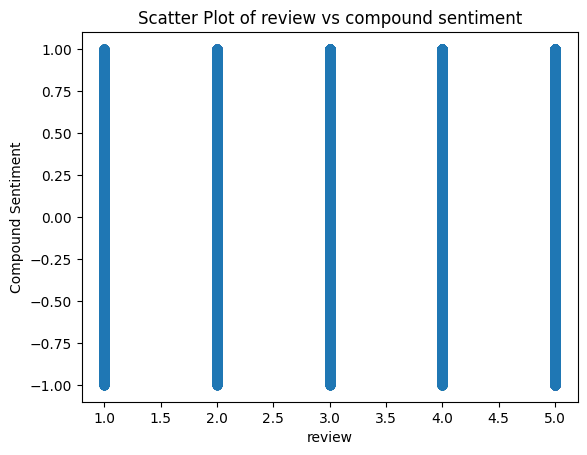

In [94]:
plt.scatter(df_all_data_processed['review'], df_all_data_processed['compound_sentiment'], alpha=0.5)
plt.xlabel('review')
plt.ylabel('Compound Sentiment')
plt.title('Scatter Plot of review vs compound sentiment')
plt.show()

In [121]:
df_all_data_processed[['compound_sentiment', 'review']].corr().style.background_gradient(cmap='Blues')

,compound_sentiment,review
compound_sentiment,1.000000,0.258966
review,0.258966,1.000000


### Key Findings for Compound Sentiment

- From the Distribution Plot, it is visible that Compound Sentiment Feature is biased to high levels/positive levels.
- The Boxplot figure shows the relation between review and compound sentiment. For High score reviews, the Compound sentiments tends to increase and be positive. And for Low Review Scores, the sentiment tends to be negative. This can explain the first bullet, because the dataset contains more entries with High Score Values, the positive Compound sentiment will increse.
- The line plot confirms the relationship between review and compound sentiment, plotting the mean of the compound sentiment for each review score. There is a positive relation. When review tends to be high, compound sentiment tends to be 1. 

## EDA for Review Text Column

In [95]:
pd.set_option('display.max_colwidth', 150)

In [96]:
df_all_data_processed[df_all_data_processed['review']==5]['text_clean'].sample(5, random_state=1299)

361508    loved tf perfect truetolife books neither holy bible books many enemies attack dollar words truth intellectual someone simply afraid one answers d...
111812    shipping little slow  days order well advance need another book class apologized late though book looks great markings im happy iti would order again
156393    years since last read donald goines books wow still powerful back s black girl lost real live ride die chic back true love folks survive book brou...
65313     books basics guide come home hospital actually brought book hospital found handy recovering csection still refer even baby  month oldthe book divi...
114941    treasure elementary esol classroomparticularly useful classrooms students languages different scriptsit comes two versions mini dictionary board b...
Name: text_clean, dtype: object

Word Cloud of most repeated 100 words on reviews with a review Score = 5. 


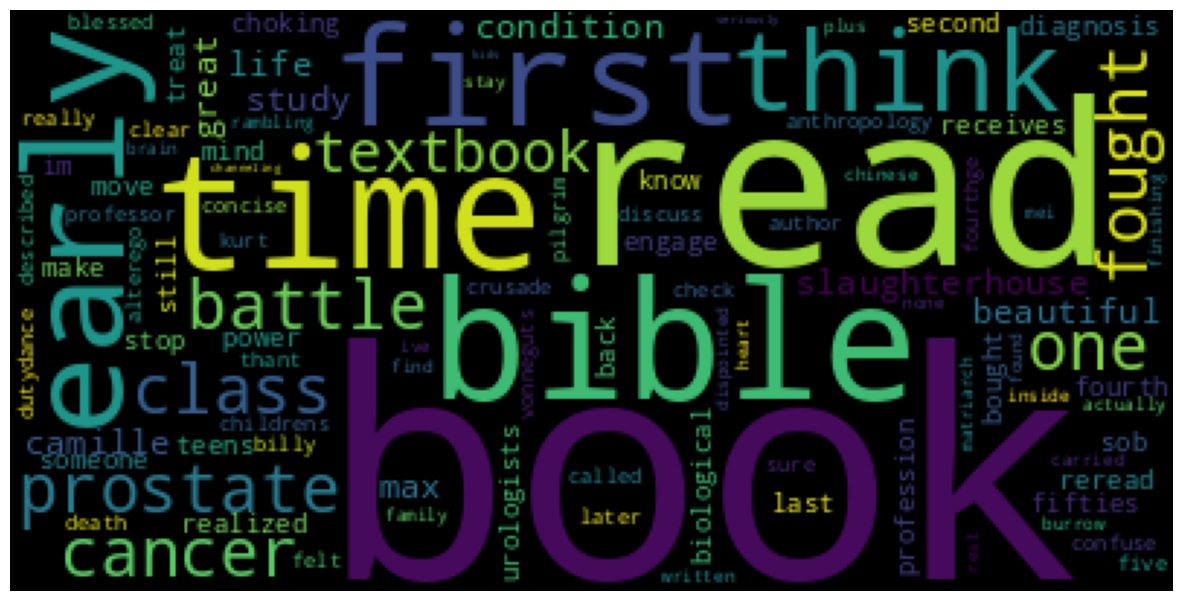

In [99]:
wordcloud5 = WordCloud(max_words=100).generate(str(df_all_data_processed[df_all_data_processed['review']==5]['text_clean']))

fig = plt.figure(figsize=(15,12))

plt.axis('off')

plt.imshow(wordcloud5)

plt.show()

In [100]:
df_all_data_processed[df_all_data_processed['review']==1]['text_clean'].sample(5, random_state=1299)

296018                                    say title review states all worst book ever read even want finish always finish start totally regretted it waste time
71910     hohum another work fabrication paragon virtue dick morris without him would hookers specialize toes sucked find paying customer? stupid andor corr...
17647                                                             place book reviews religious nonreligious opinion airing stick books christian bashing please
13591     fast read however book akin compendium previously published magazine articles consequently makes oeuvre  term paper reading book paul allen demyst...
92056                                                                               to loan people like lousy story poorly told hugh cast unlikeable characters
Name: text_clean, dtype: object

In [101]:
df_all_data_processed[df_all_data_processed['review']==3]['text_clean'].sample(5, random_state=1299)

379857                                                     book good pictures findings however getting book learn basics beadwork book good one would recommend
85053     purchased book woody guthrie love bob dylan know woody big influence dylani liked book general lot book interest found bored take note interest bo...
442358    enjoy read simple plot characters educated socialized welldressed coiffuredjust right everything harvard university; right novel numbers africanam...
61988                                                                               book nice read enjoyable read curiosities unfortunately look deeper subject
317842    small nonprofit company work needed website drew short straw designing maintaining it bought studio mx suite hoped book would cover everything nee...
Name: text_clean, dtype: object

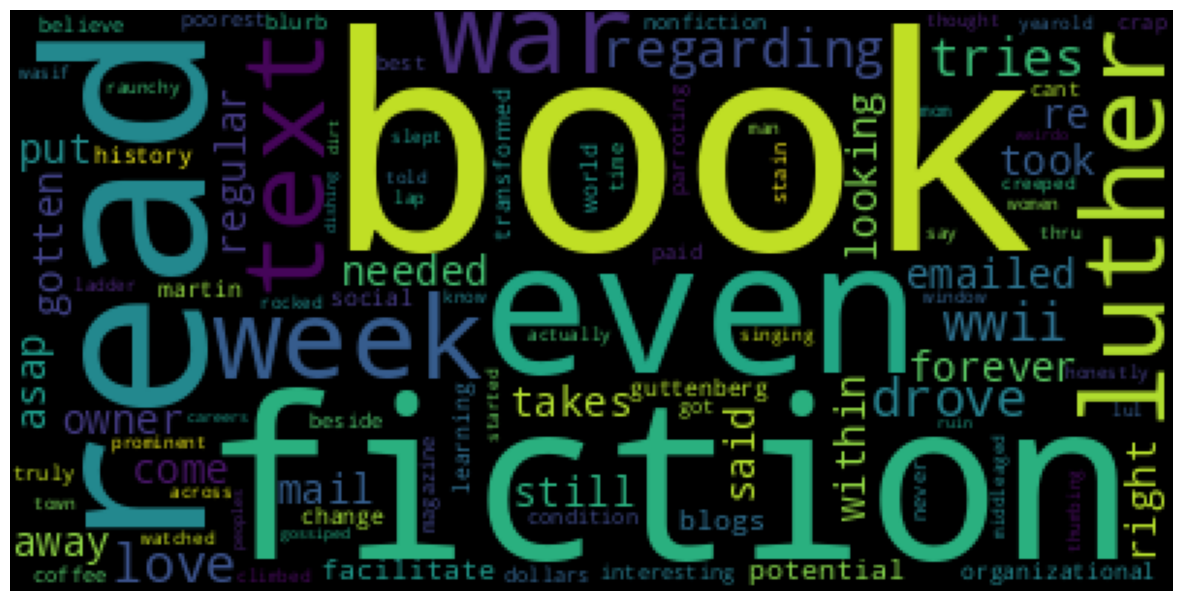

In [103]:
wordcloud1 = WordCloud(max_words=100).generate(str(df_all_data_processed[df_all_data_processed['review']==1]['text_clean']))

fig = plt.figure(figsize=(15,12))

plt.axis('off')

plt.imshow(wordcloud1)

plt.show()

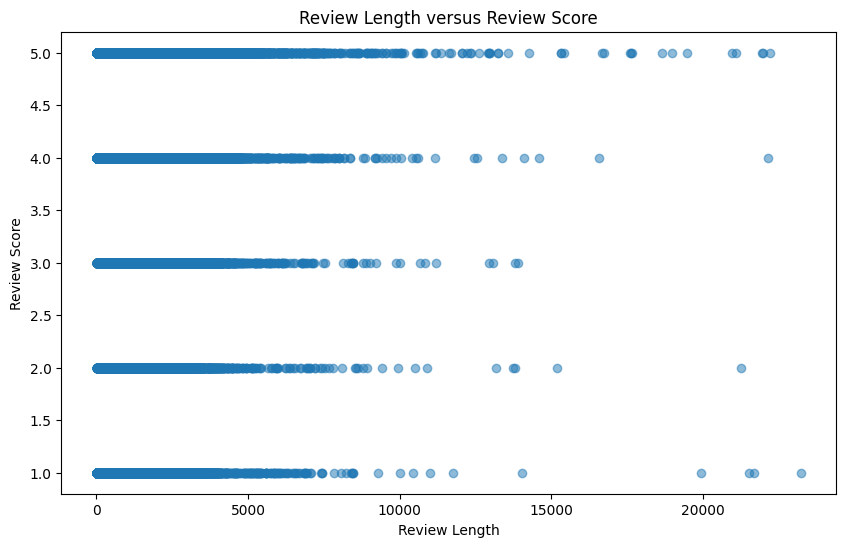

In [104]:
plt.figure(figsize=(10, 6))
plt.scatter(df_all_data_processed['text_clean'].str.len(), df_all_data_processed['review'], alpha=0.5)
plt.title('Review Length versus Review Score')
plt.xlabel('Review Length')
plt.ylabel('Review Score')
plt.show()

In [105]:
df_all_data_processed['text_clean'].str.len().mean()

538.3815490951827

In [106]:
df_all_data_processed['text_clean'].str.len().std()

645.9650106929613

In [107]:
long_reviews = df_all_data_processed[df_all_data_processed['text_clean'].str.len() > 2000].copy()

len(long_reviews)

17116

In [108]:
long_reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
published_year,17116.0,1999.302816,30.057488,101.0,1998.000000,2005.000000,2012.0000,2023.0
review_year,17116.0,2006.031199,3.704711,1996.0,2003.000000,2006.000000,2009.0000,2013.0
helpfulness,17116.0,0.818459,0.249033,0.0,0.714286,0.930495,1.0000,1.0
compound_sentiment,17116.0,0.548686,0.763004,-1.0,0.615175,0.982400,0.9949,1.0
review,17116.0,4.115623,1.169587,1.0,4.000000,5.000000,5.0000,5.0


In [109]:
long_reviews['text_clean'].str.len().mean()

2966.4876723533534

In [110]:
short_reviews = df_all_data_processed[df_all_data_processed['text_clean'].str.len() < 200].copy()

len(short_reviews)

152353

In [111]:
short_reviews['text_clean'].str.len().mean()

120.6094267917271

In [112]:
short_reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
published_year,152353.0,2000.221111,27.672034,101.0000,1998.0000,2006.0000,2012.000,2023.0000
review_year,152353.0,2006.797812,5.133888,1995.0000,2002.0000,2008.0000,2012.000,2013.0000
helpfulness,152353.0,0.755938,0.367735,0.0000,0.5000,1.0000,1.000,1.0000
compound_sentiment,152353.0,0.570433,0.424367,-0.9951,0.4215,0.7351,0.875,0.9931
review,152353.0,4.332333,1.163183,1.0000,4.0000,5.0000,5.000,5.0000


In [113]:
high_reviews = df_all_data_processed[df_all_data_processed['review'] == 5].copy()

high_reviews['text_clean'].str.len().mean()

493.6077312633335

In [114]:
neutral_reviews = df_all_data_processed[df_all_data_processed['review'] == 3].copy() # Neutral ratings tend to be larger in words count

neutral_reviews['text_clean'].str.len().mean()

642.2337482710926

In [115]:
low_reviews = df_all_data_processed[df_all_data_processed['review'] == 1].copy()

low_reviews['text_clean'].str.len().mean()

515.2976287578653

<Figure size 1000x600 with 0 Axes>

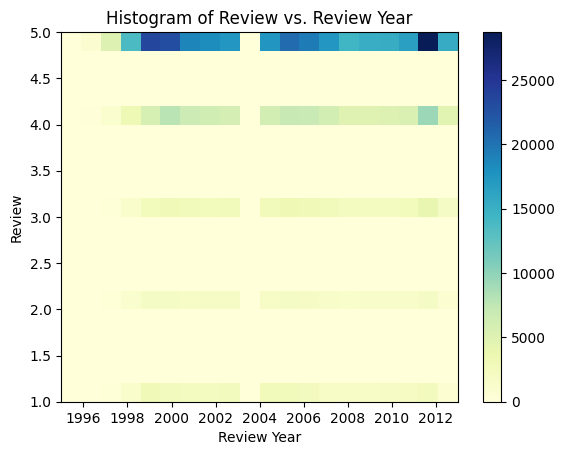

In [116]:
# Create a figure and a set background color
fig = plt.figure(figsize=(10, 6))
plt.figure()
plt.hist2d(df_all_data_processed['review_year'], df_all_data_processed['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Review Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

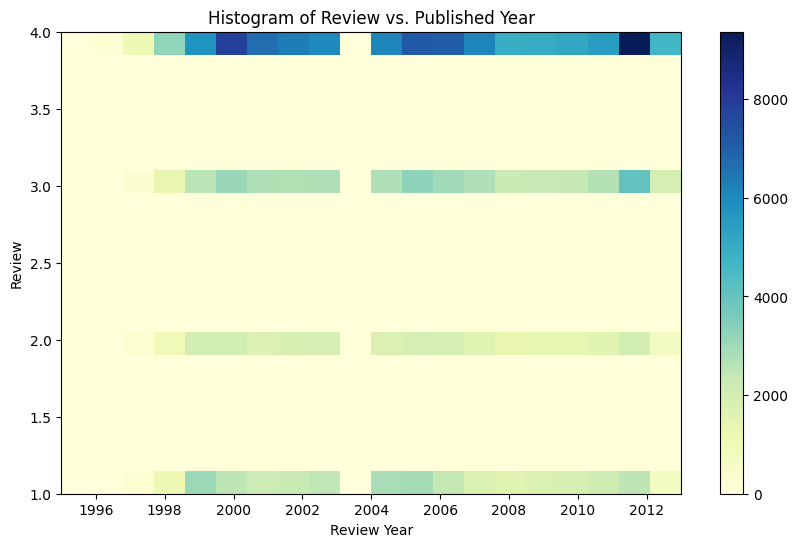

In [117]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_all_data_processed[df_all_data_processed['review'] != 5]['review_year'], df_all_data_processed[df_all_data_processed['review'] != 5]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Published Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

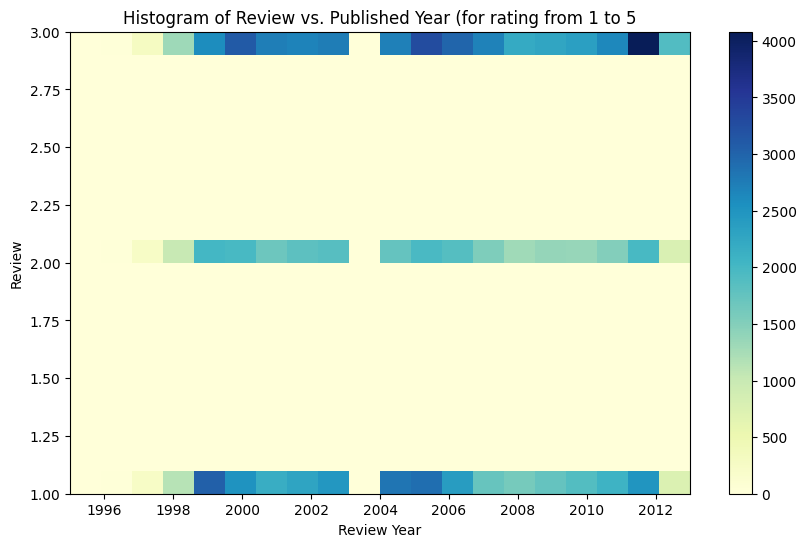

In [118]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_all_data_processed[(df_all_data_processed['review'] != 4) & (df_all_data_processed['review'] != 5)]['review_year'], df_all_data_processed[(df_all_data_processed['review'] != 4) & (df_all_data_processed['review'] != 5)]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.colorbar()
plt.title('Histogram of Review vs. Published Year (for rating from 1 to 5')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

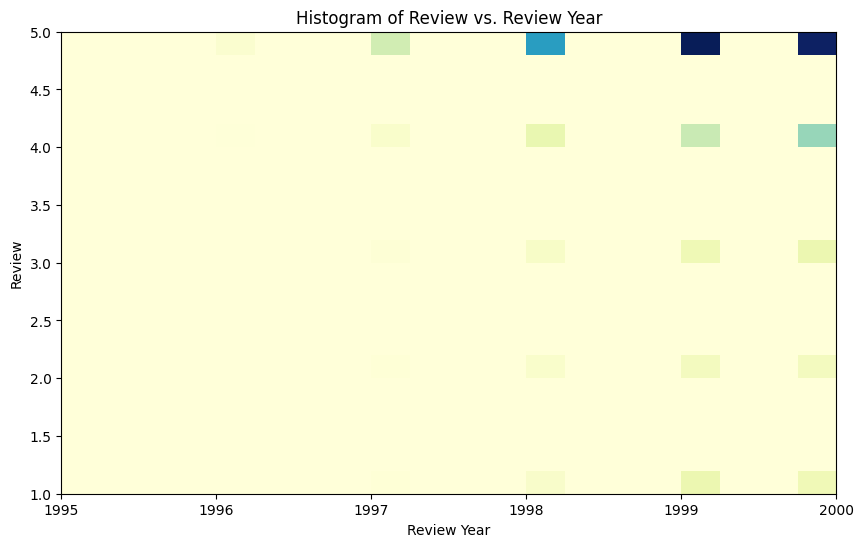

In [119]:
plt.figure(figsize=(10, 6))
plt.hist2d(df_all_data_processed[df_all_data_processed['review_year'] <= 2000]['review_year'], df_all_data_processed[df_all_data_processed['review_year'] <= 2000]['review'], bins=(20, 20), cmap=plt.cm.YlGnBu)
plt.title('Histogram of Review vs. Review Year')
plt.xlabel('Review Year')
plt.ylabel('Review')
plt.show()

# Multivariable Analysis

In [122]:
df_all_data_processed.select_dtypes('number').corr().style.background_gradient(cmap='Blues')

,published_year,review_year,helpfulness,compound_sentiment,review
published_year,1.000000,-0.028819,-0.011382,-0.001097,-0.012494
review_year,-0.028819,1.000000,0.098260,0.013547,0.007362
helpfulness,-0.011382,0.098260,1.000000,0.133881,0.302751
compound_sentiment,-0.001097,0.013547,0.133881,1.000000,0.258966
review,-0.012494,0.007362,0.302751,0.258966,1.000000


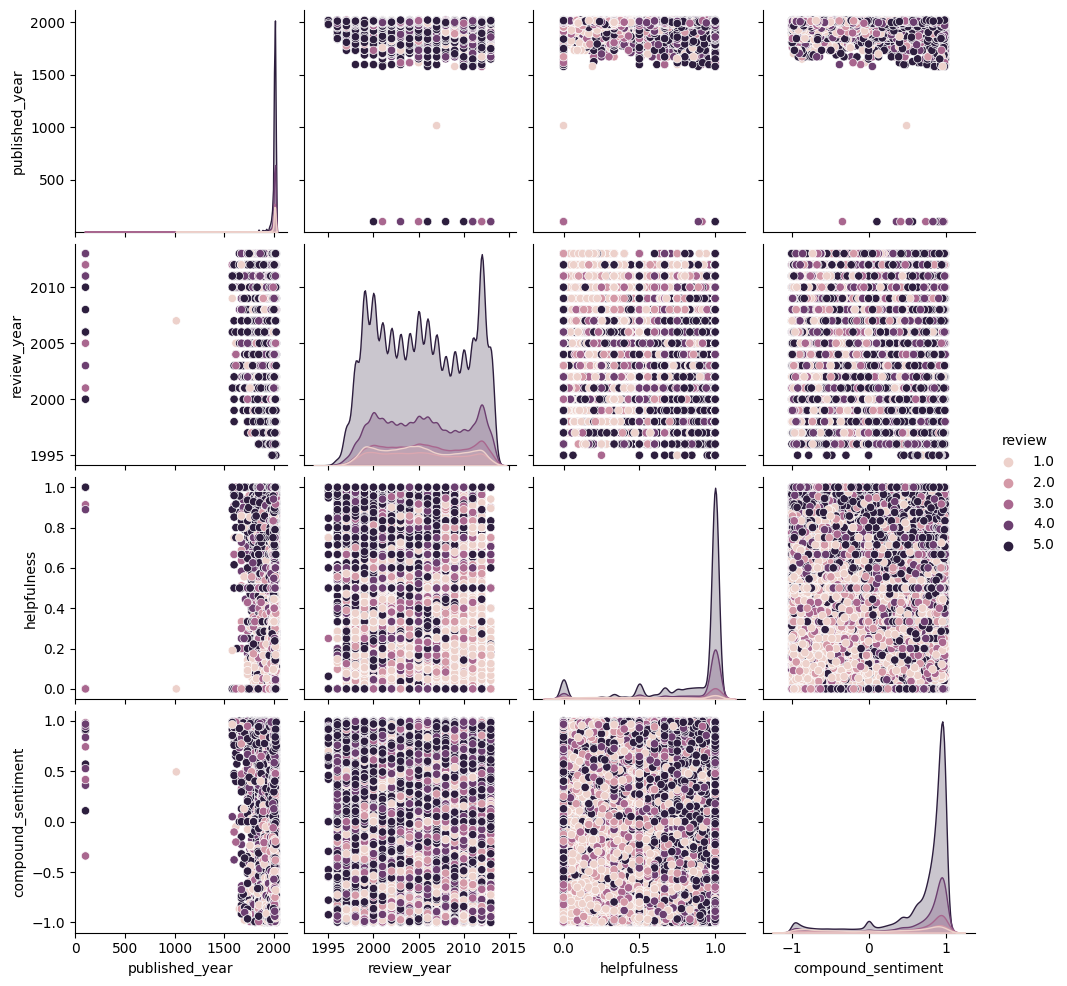

In [123]:
sns.pairplot(data=df_all_data_processed, hue='review')
plt.show()

# Final Findings from EDA.

- Categorical features Authors, Publisher and Categories are biased to high score values. But have an important variability shown in the countplot figures. So, they will be kept. The model training and testing results with and without using the features, and the crossvalidation will determine if the variables should be removed.


# Model Selection, Training and Testing

- The current project is a regression exercise for predicting a continous value for the Review Score of the Review.
- The dataset contains multiple features. Some of the Categorical which are stored on lists (authors and Categories), a Cateogorical feature Publisher. 
- The dataset contains 4 numerical features, where we have discrete variables (published year, review_year) and continuos variables (helpfulness and compund_sentiment)
- Lastly, the dataset contains a text column that will be vectorized.

- Authors and Categories will be processed with One Hot Encoding, creating a Column for each category in the list. 
- Publisher will be encoded as well

In [243]:
df_final = df_all_data_processed.copy()

In [244]:
df_final.sample(10)

,authors,categories,publisher,published_year,review_year,helpfulness,text_clean,compound_sentiment,review
154534,[Other],[Biography & Autobiography],Other,2008,2003,1.000000,marvin v arnett spun delightful coming age saga starts much delighted united states great depression strike world war ii way family tragedies rio...,-0.7972,5.0
145661,[Other],[Fiction],Other,2000,2002,1.000000,fantasy lover truly recommend book starts catastrophe changes lives two innocent young boys shea flick forever unwilling yet choice shea starts jo...,0.9812,4.0
373336,[Other],[Other],Other,2016,2002,0.923077,programmers learned languages c++ find learning java easy somewhat painless since use object oriented programming experience?for experience ooprog...,0.4417,3.0
55775,[Other],[Fiction],Other,2009,2012,1.000000,great item wanted shipping fast service promt expected use futrue,0.6249,5.0
131109,[Other],[Fiction],Other,2006,2005,0.941176,fbi hostage negotiator max bhagat discovers longtime love gina killed car bomb germany races berlin fbi agent jules cassidy identify body bring ho...,0.9817,3.0
303766,[Other],[Fiction],Other,2009,2013,1.000000,another great work great author radclyffe continues hold interest welldeveloped characters interesting story lines well written prose another grea...,0.9643,5.0
218737,[Other],[Juvenile Fiction],Other,2009,2002,1.000000,born reared nc best worlds coast mtns book wonderful pictorial glimpse state holiday season along good recipes etc im trying find copies &quot;al...,0.9538,5.0
352959,[Other],[Juvenile Fiction],Other,2019,2000,1.000000,read book high school english project thought book informative im picky reader read book boring spots assure book good found boring spots wanna pu...,0.8625,5.0
198311,[Other],[Fiction],Other,2002,2005,0.400000,pw review used hokey cartoonish describe book agree more think every low budget madeforcabletv movie ever seen starring typical blevel actors got ...,-0.4877,2.0
138701,[J. K. Rowling],[Juvenile Fiction],Other,2014,1999,1.000000,im finished book thought awsome long thourough deep took days read went hours time also loved ending think book would great ages,0.8402,5.0


In [245]:
label_encoder_publisher = LabelEncoder()

In [246]:
df_final.shape

(502038, 9)

In [247]:
#Publisher 
df_final['publisher_Label'] = label_encoder_publisher.fit_transform(df_final['publisher'])
df_final = df_final.drop(['publisher'], axis=1)
df_final.sample(5)

,authors,categories,published_year,review_year,helpfulness,text_clean,compound_sentiment,review,publisher_Label
317167,[Other],[Fiction],2005,2012,1.000000,walked streets delft story felt like took place right there although fiction constructing girl pearl earring goes long way bring vermeer life time...,0.9894,5.0,5
21460,[Other],[Fiction],2006,2002,0.000000,think dont like book whack book could best book ever written dont even know it love book think represents school skerz preps i sker author book ru...,0.9148,5.0,6
188291,[Other],[Other],2001,2000,0.666667,book read diceys song cynthia voigt book sequel homecoming also cynthia voigt kids dicey sammy maybeth james grandmothers house crisfield maryland...,0.8481,5.0,8
304567,[Other],[Other],2011,2001,0.947368,rabbi kushners latest book offers wonderful reflections living life purpose meaning opportunity read book amidst news terror destruction emanating...,0.9657,5.0,5
191184,[Other],[Religion],1985,2009,1.000000,summation kittels magnum opus essential nonscholars interested biblical exegesis sweeping overviews cultural theological foundations various words...,0.4019,5.0,5


In [248]:
df_final = df_final.explode('authors')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 502906 entries, 0 to 502037
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   authors             502906 non-null  object 
 1   categories          502906 non-null  object 
 2   published_year      502906 non-null  int64  
 3   review_year         502906 non-null  int64  
 4   helpfulness         502906 non-null  float64
 5   text_clean          502903 non-null  object 
 6   compound_sentiment  502906 non-null  float64
 7   review              502906 non-null  float64
 8   publisher_Label     502906 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 38.4+ MB


In [249]:
df_final.reset_index(drop=True, inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502906 entries, 0 to 502905
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   authors             502906 non-null  object 
 1   categories          502906 non-null  object 
 2   published_year      502906 non-null  int64  
 3   review_year         502906 non-null  int64  
 4   helpfulness         502906 non-null  float64
 5   text_clean          502903 non-null  object 
 6   compound_sentiment  502906 non-null  float64
 7   review              502906 non-null  float64
 8   publisher_Label     502906 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 34.5+ MB


In [250]:
df_final = df_final.explode('categories')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503007 entries, 0 to 502905
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   authors             503007 non-null  object 
 1   categories          503007 non-null  object 
 2   published_year      503007 non-null  int64  
 3   review_year         503007 non-null  int64  
 4   helpfulness         503007 non-null  float64
 5   text_clean          503004 non-null  object 
 6   compound_sentiment  503007 non-null  float64
 7   review              503007 non-null  float64
 8   publisher_Label     503007 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 38.4+ MB


In [251]:
df_final.reset_index(drop=True, inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503007 entries, 0 to 503006
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   authors             503007 non-null  object 
 1   categories          503007 non-null  object 
 2   published_year      503007 non-null  int64  
 3   review_year         503007 non-null  int64  
 4   helpfulness         503007 non-null  float64
 5   text_clean          503004 non-null  object 
 6   compound_sentiment  503007 non-null  float64
 7   review              503007 non-null  float64
 8   publisher_Label     503007 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 34.5+ MB


In [252]:
label_encoder_author = LabelEncoder()

In [253]:
#Publisher 
df_final['author_Label'] = label_encoder_author.fit_transform(df_final['authors'])
df_final = df_final.drop(['authors'], axis=1)
df_final.sample(5)

,categories,published_year,review_year,helpfulness,text_clean,compound_sentiment,review,publisher_Label,author_Label
449238,Juvenile Fiction,2015,2005,0.924419,kids pretty savvy comes discovering books fill particular need library work id seen taking warriors series erin hunter fairly regularly reason nea...,0.9963,4.0,2,7
278837,Other,2008,2004,1.000000,mario pei must admit started studies linguistics began high school followed college shaped career first book read solo work &quot;the story langua...,0.8748,5.0,5,7
197056,Fiction,2008,2009,1.000000,timing reading book perfect tudors season presently aired tv covers period history boleyn inheritance does henrys beloved wife jane seymour died ...,0.9878,5.0,8,7
63383,Fiction,2006,1997,0.200000,already read almost every book heinlein wrote got one think would ever find book would hate it gave thought inspired plot pan rest due really rea...,-0.1280,1.0,5,7
434989,Juvenile Fiction,1999,1999,0.000000,first book sorcerers stone absolutely phenomenal third book prisoner azkaban terrific one like overpriced goosebumps book published hardcover cons...,0.8176,2.0,5,3


In [254]:
label_encoder_category = LabelEncoder()

In [255]:
df_final['category_Label'] = label_encoder_category.fit_transform(df_final['categories'])
df_final = df_final.drop(['categories'], axis=1)
df_final.sample(5)

,published_year,review_year,helpfulness,text_clean,compound_sentiment,review,publisher_Label,author_Label,category_Label
416664,2009,2003,0.737805,purchased deck cards hoping get top quality product pleasedthe paper good quality stock images realistici believe cards top notch collectors item,0.8074,5.0,5,7,5
395482,2012,2003,1.000000,lord rings two towersby jrr tolkieni must admit beginning story little slow get little it becomes greatest thing ever read wont able put down real...,-0.5520,5.0,2,4,4
131371,1997,1998,1.000000,book slow beginning read pages could put down read exciting book long time thoroughly enjoyed moment increase pulse heartbeat,0.8540,5.0,5,7,7
499448,2005,2006,0.456522,first book differs online writings[] mainly organizational structure ideas presented logical sequence building case political polemic case well re...,-0.9604,3.0,5,7,5
72316,2010,1999,1.000000,found catch well written found humour bland utterly repetitive even though main theme novel yossarian cast around around circle catch reason givin...,0.3197,4.0,8,7,4


In [256]:
df_final.isna().sum()

published_year        0
review_year           0
helpfulness           0
text_clean            3
compound_sentiment    0
review                0
publisher_Label       0
author_Label          0
category_Label        0
dtype: int64

In [257]:
df_final.shape

(503007, 9)

In [258]:
df_final = df_final.dropna(how='any')
df_final.shape

(503004, 9)

In [259]:
df_final.isna().sum()

published_year        0
review_year           0
helpfulness           0
text_clean            0
compound_sentiment    0
review                0
publisher_Label       0
author_Label          0
category_Label        0
dtype: int64

In [265]:
#Divide Data Set into Train Test Datasets
X = df_final.copy().drop(['review'], axis=1)
y = df_final['review'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1530) #stratify: para definir los datasets de forma proporcional acorde a y.

X_train.sample(5)

,published_year,review_year,helpfulness,text_clean,compound_sentiment,publisher_Label,author_Label,category_Label
432471,1996,2007,0.75,enjoyed alienist angel darkness looked forward caleb carr novel cannot believe wrote it based books expected well developed characters well resear...,-0.1556,5,7,0
428528,1940,2003,0.50,hemingway spans quite range finished reading great gatsby interested jaded boredwithlife spoiled rich drink drink read sun also rises finished dr ...,0.9578,5,7,7
468354,2001,2006,0.00,beautiful visuals works phenomenal seattle architectural firm which aia firm award knowledgable accompanying text perhaps leading seattle archite...,0.7430,5,7,7
338981,1999,2003,0.00,michael stackpole perfectly meshes science fiction fantasy aspects star wars universe romance mystery first person perspective tale corran horns q...,0.8957,5,7,4
91831,2009,1999,1.00,read better danielle steel &amp; certainly read worse guess enjoyed book found usual author repeats constantly we get point already takes entire p...,0.8442,5,7,4


In [266]:
X_train.isna().sum()

published_year        0
review_year           0
helpfulness           0
text_clean            0
compound_sentiment    0
publisher_Label       0
author_Label          0
category_Label        0
dtype: int64

In [274]:
vec_model = CountVectorizer(stop_words = "english")

In [275]:
X_train['text_clean'] = vec_model.fit_transform(X_train['text_clean'] ).toarray()

MemoryError: Unable to allocate 1.88 TiB for an array with shape (377253, 685288) and data type int64

In [ ]:
X_test = vec_model.transform(X_test).toarray()

In [267]:
# vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=1.0)#min_df: Flotante de 0 a 1, Entero: La cuenta. cuantas veces tiene que haber aparecido la palabra para considerarla o eliminar

In [268]:
# X_train_text_clean_vec = vectorizer.fit_transform(X_train['text_clean'])

In [269]:
# X_train_text_clean_vec.shape

(377253, 93901)

In [270]:
# vectorizer.get_feature_names_out()

array(['__', '___', '____', ..., 'zx', 'zygote', 'zz'], dtype=object)

In [271]:
# vectorizer.get_feature_names_out().shape

(93901,)

In [273]:
# pca = PCA(n_components=2, random_state=2109)
# pca_vecs = pca.fit_transform(X_train_text_clean_vec.toarray())

MemoryError: Unable to allocate 264. GiB for an array with shape (377253, 93901) and data type float64

Apply scaler to years?

Add all preprocessing to Pipeline

In [ ]:
# #Publisher 
# df_final['authors_Label'] = df_final['authors'].astype('category').cat.codes
# df_final = df_final.drop(['publisher'], axis=1)
# df_final.sample(5)

In [195]:
# authors_dummies = pd.get_dummies(df_final['authors'].explode(), prefix='Author', drop_first=True)
# authors_dummies.head(10)